In [3]:

import utils
from Gian_experimental.NSGAIICustom.evolving_genome_threshold import NCSolutionWithGT
from Core.SearchSpace import SearchSpace
from Core.PRef import PRef
from Gian_experimental.NSGAIICustom.testing_in_vitro.SPRef import OptimisedSPref
import json
import numpy as np
import pandas as pd


processed_df_path = r"C:\Users\gac8\PycharmProjects\PSSearch\retail_forecasting_data_collection\final_results\processed_all.csv"
results_df = pd.read_csv(processed_df_path)
    


Code name: [CS CM CC][Len MFit CAtom][G3]


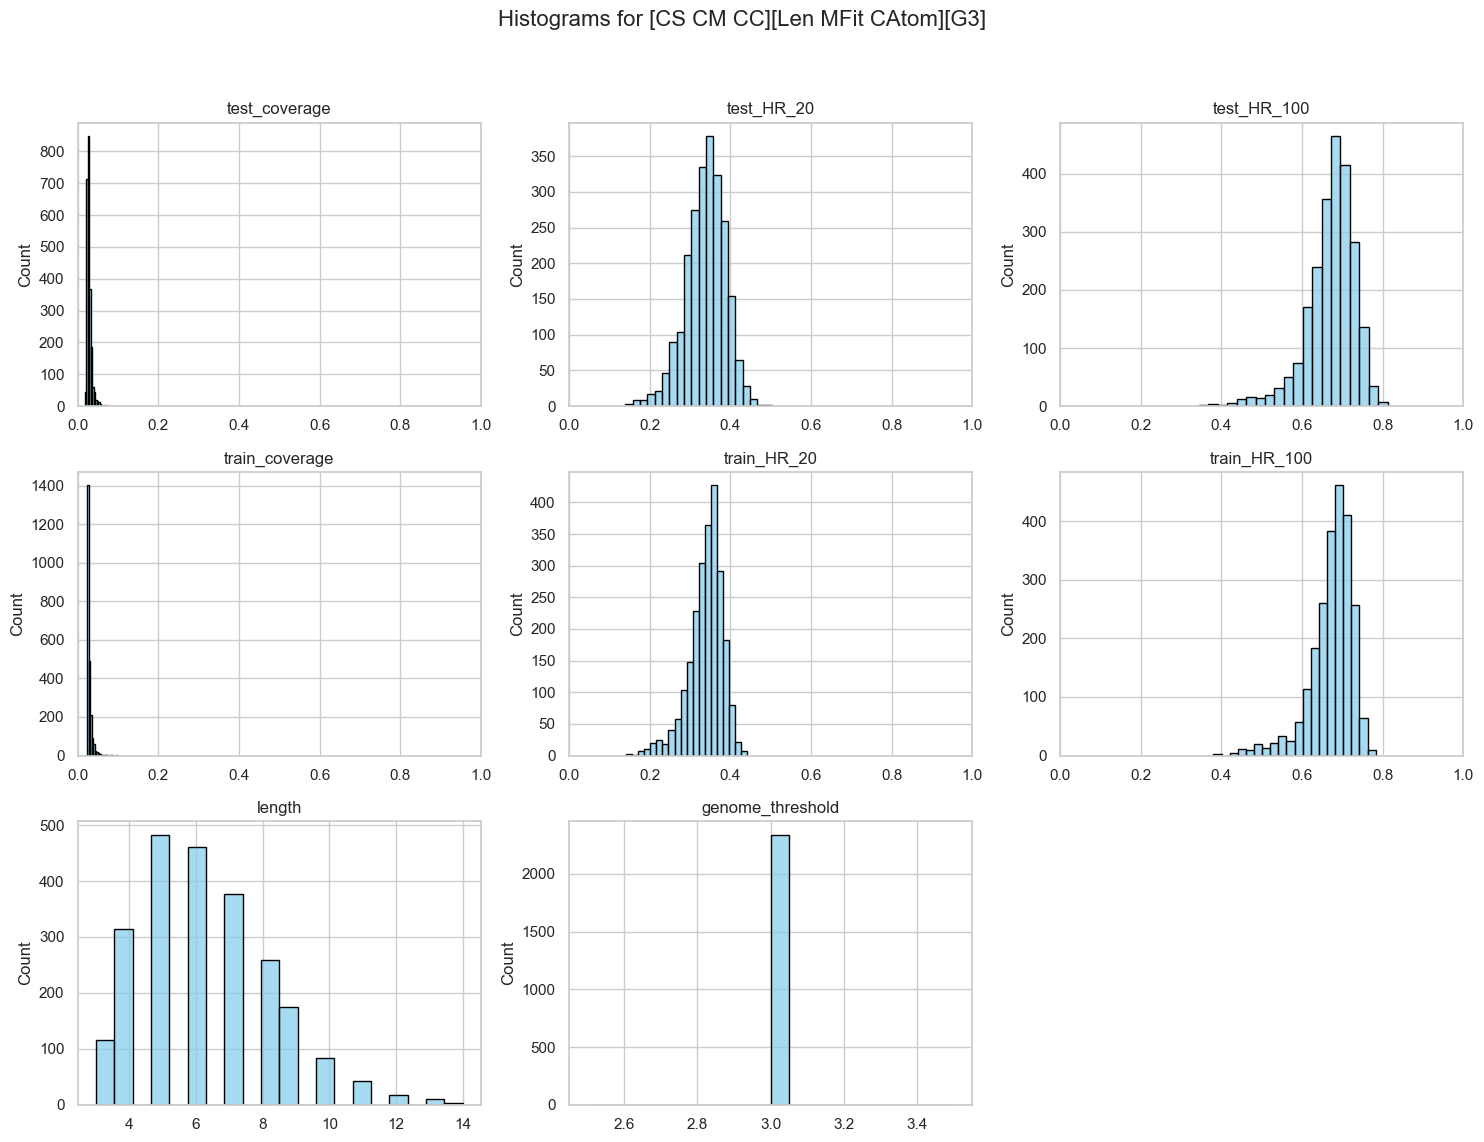

Code name: [CS CM CC][Len MFit CAtom][GNone]


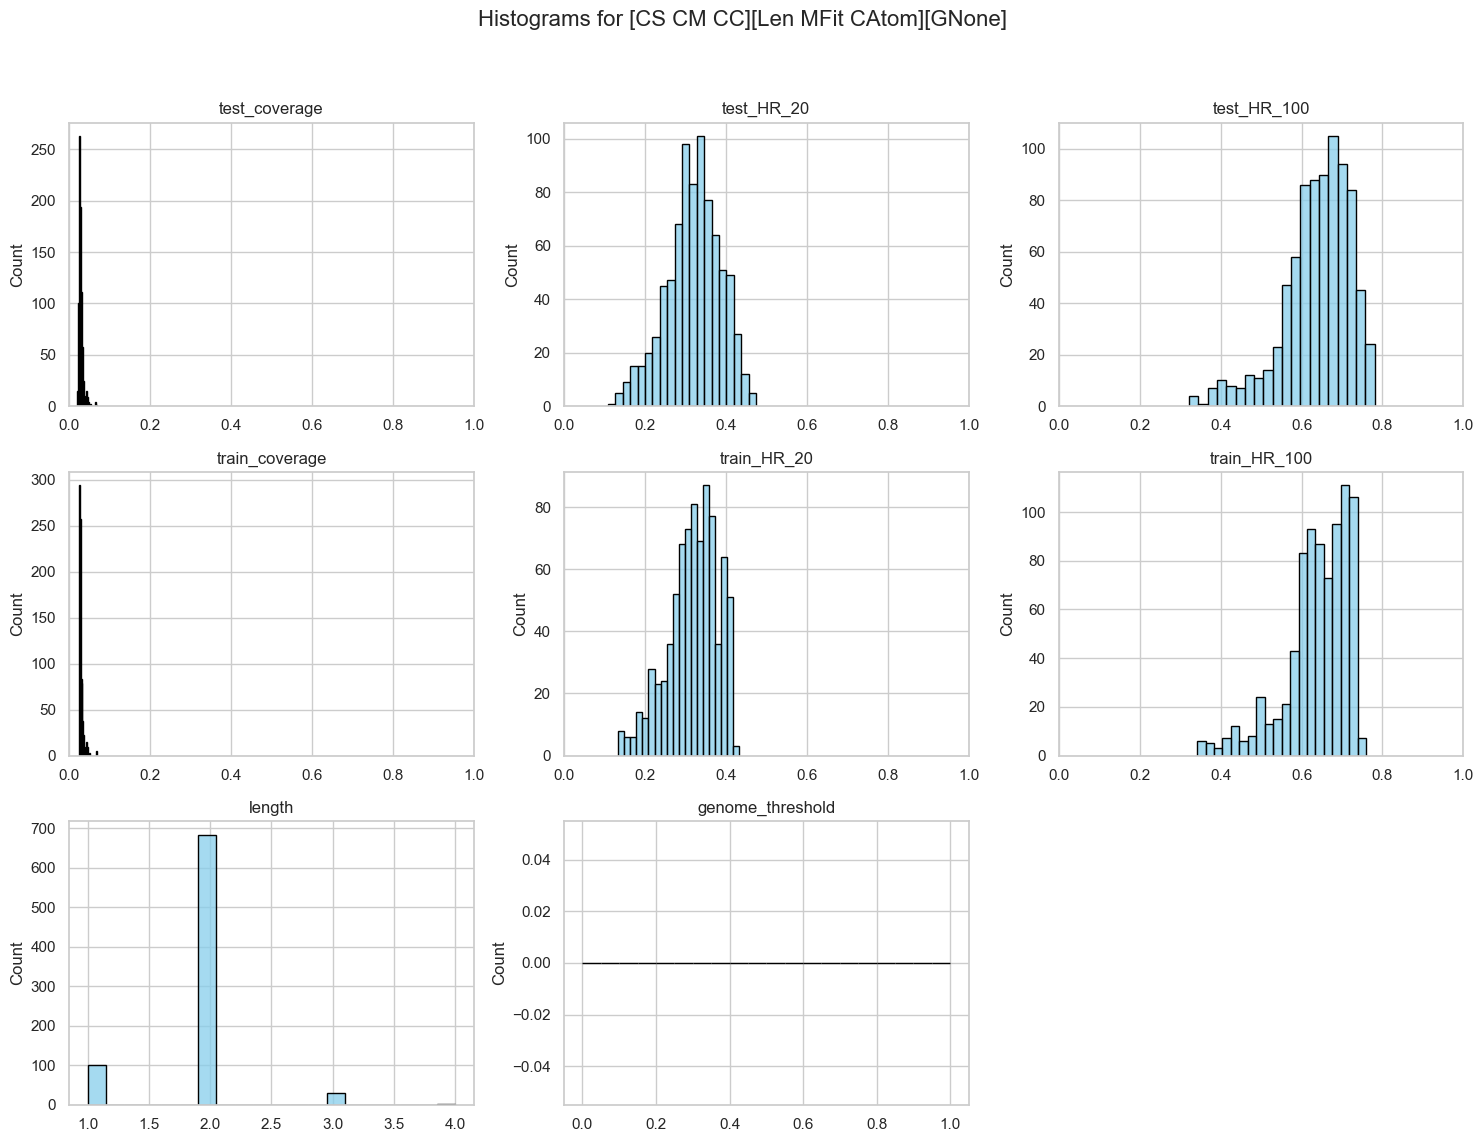

Code name: [CS CM CC][Len SSize CAtom][G3]


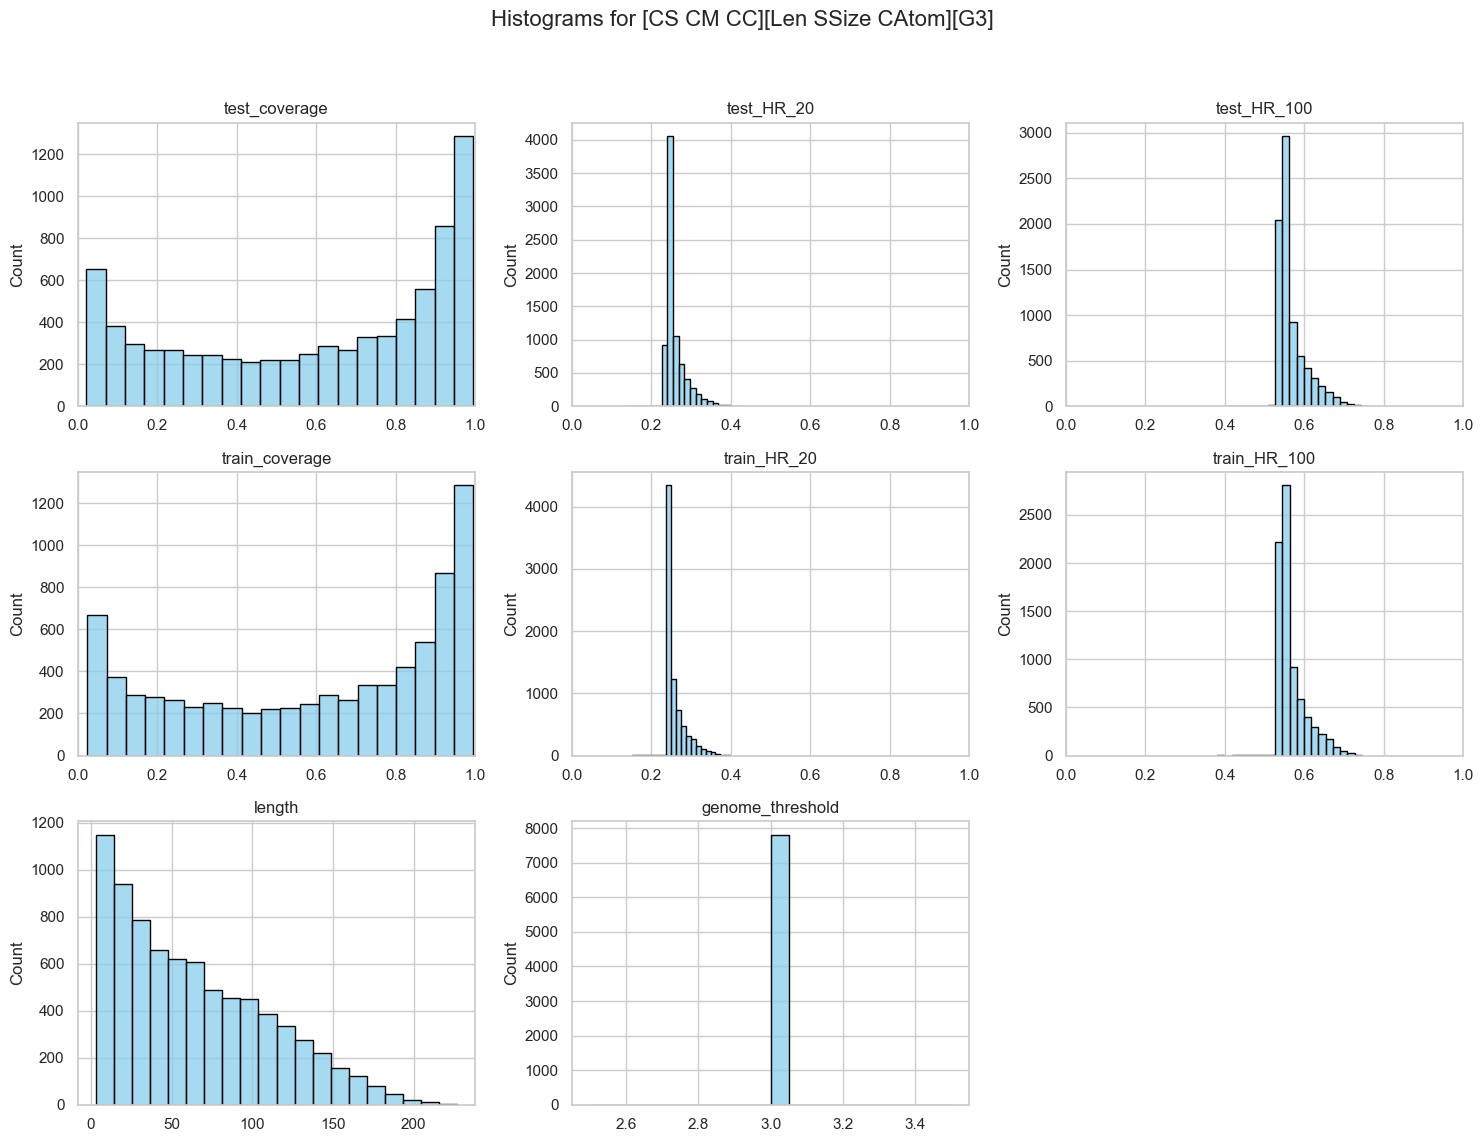

Code name: [CS CM CC][Len SSize CAtom][GNone]


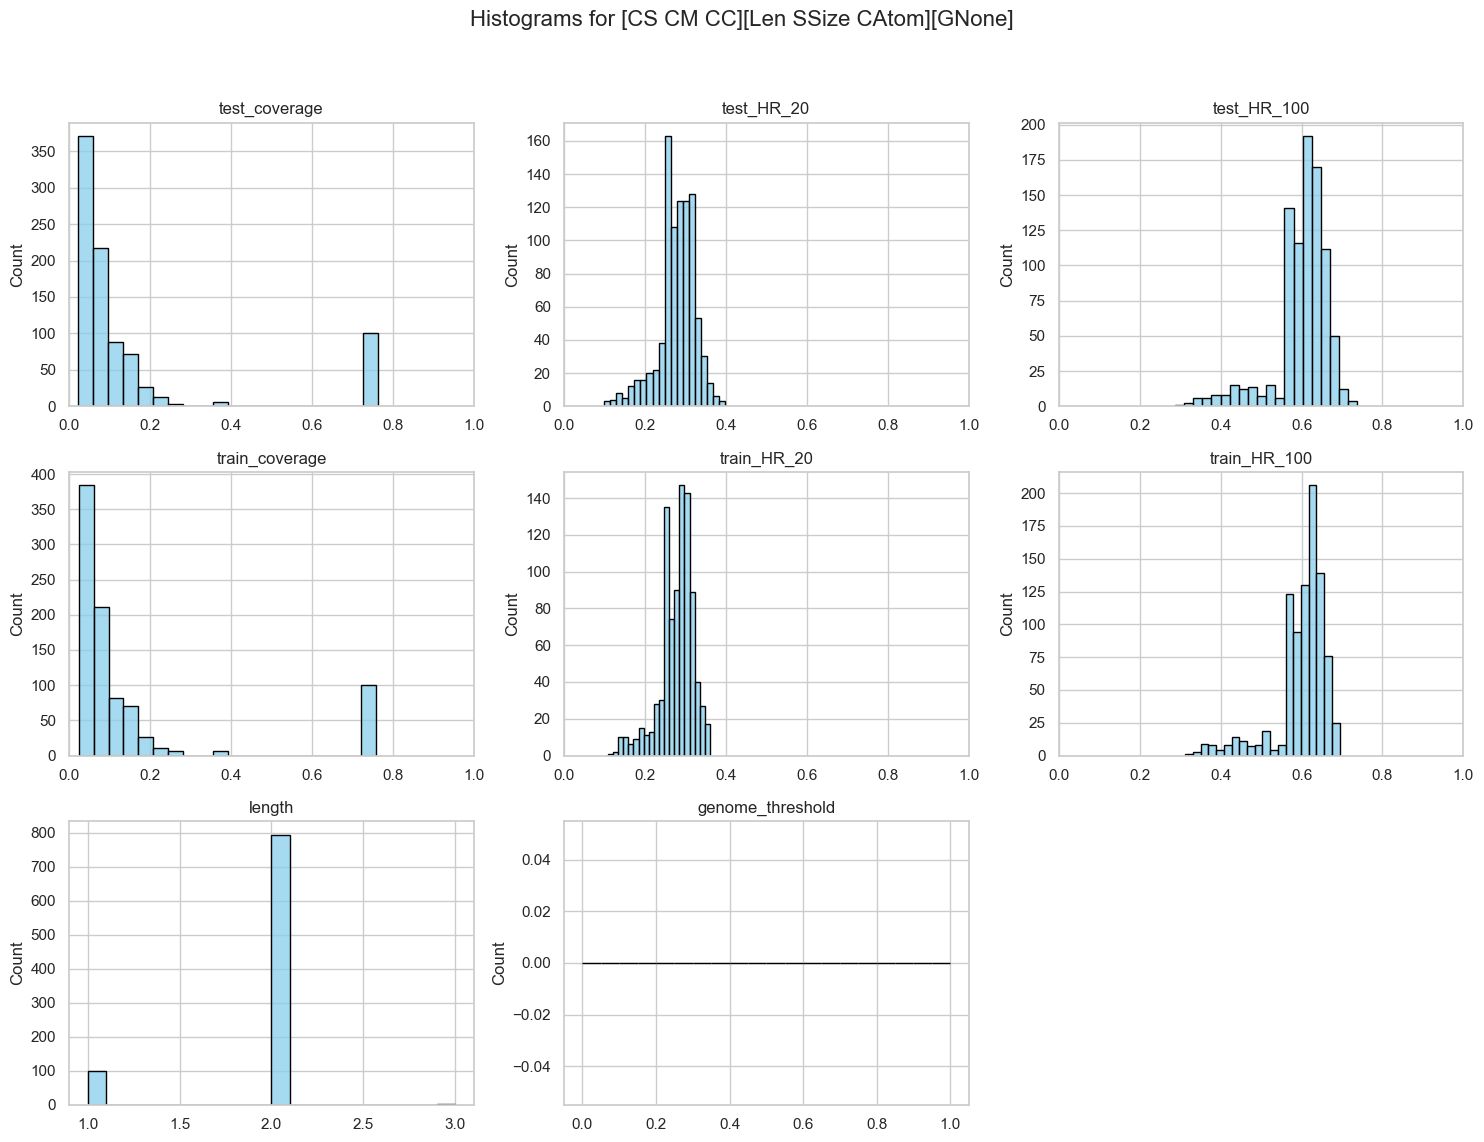

Code name: [CS CM CC][Len SSize MFit CAtom][G3]


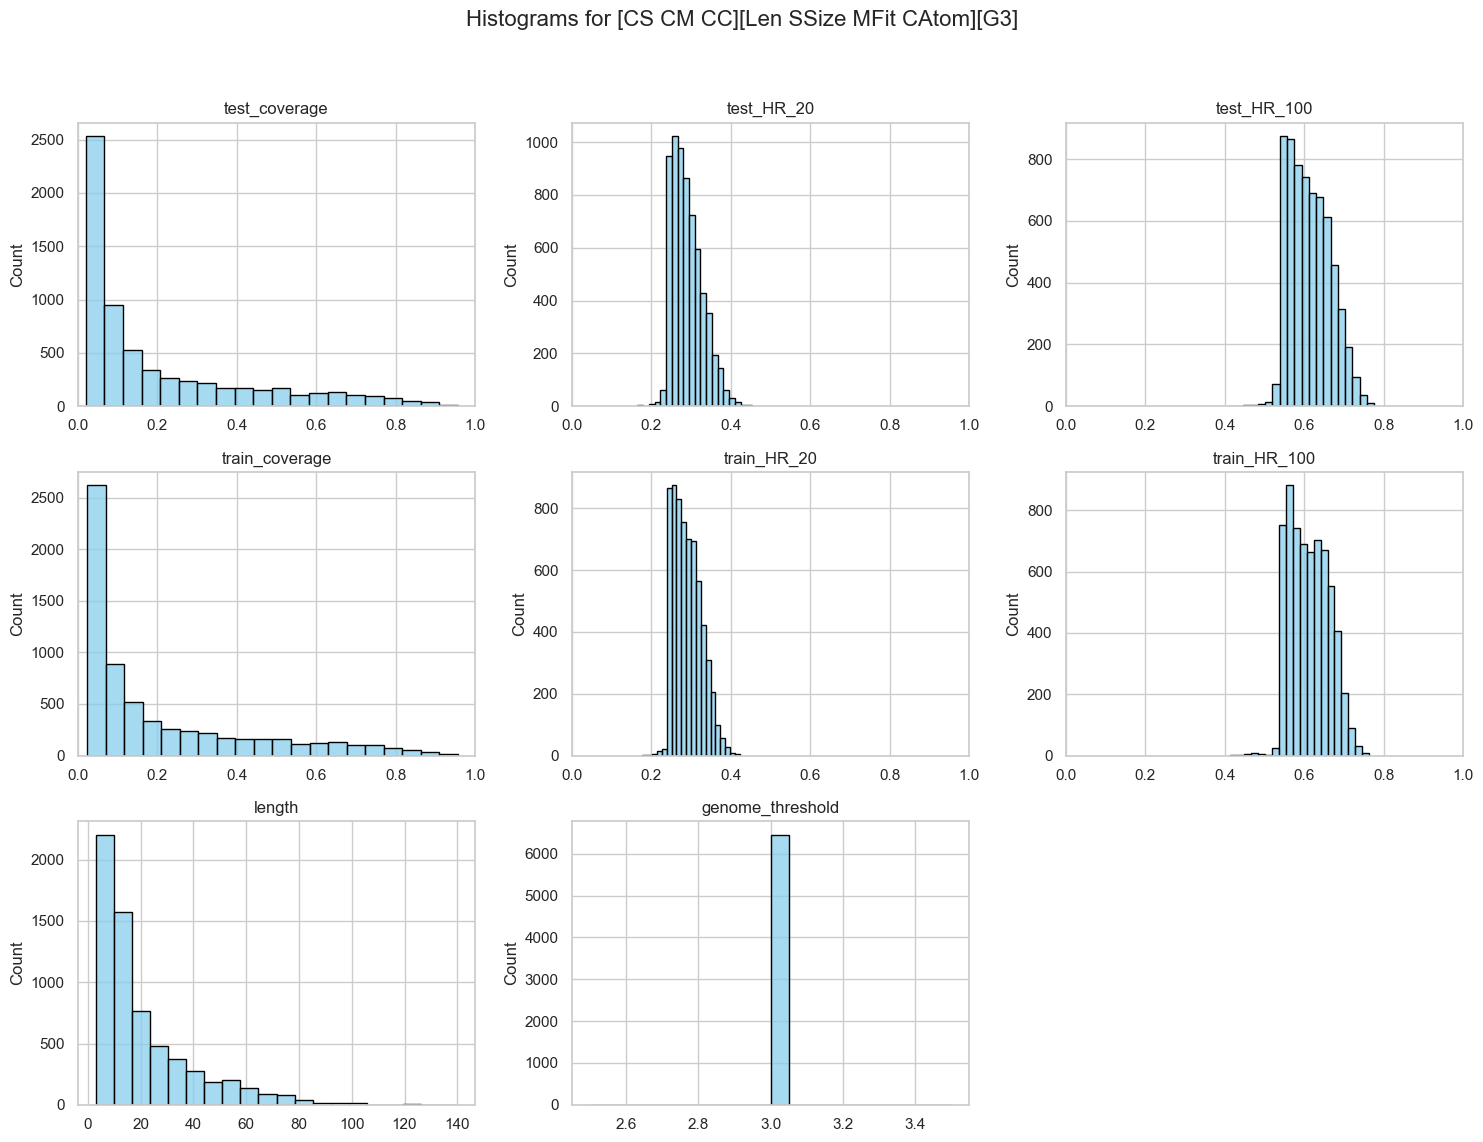

Code name: [CS CM CC][Len SSize MFit CAtom][G4]


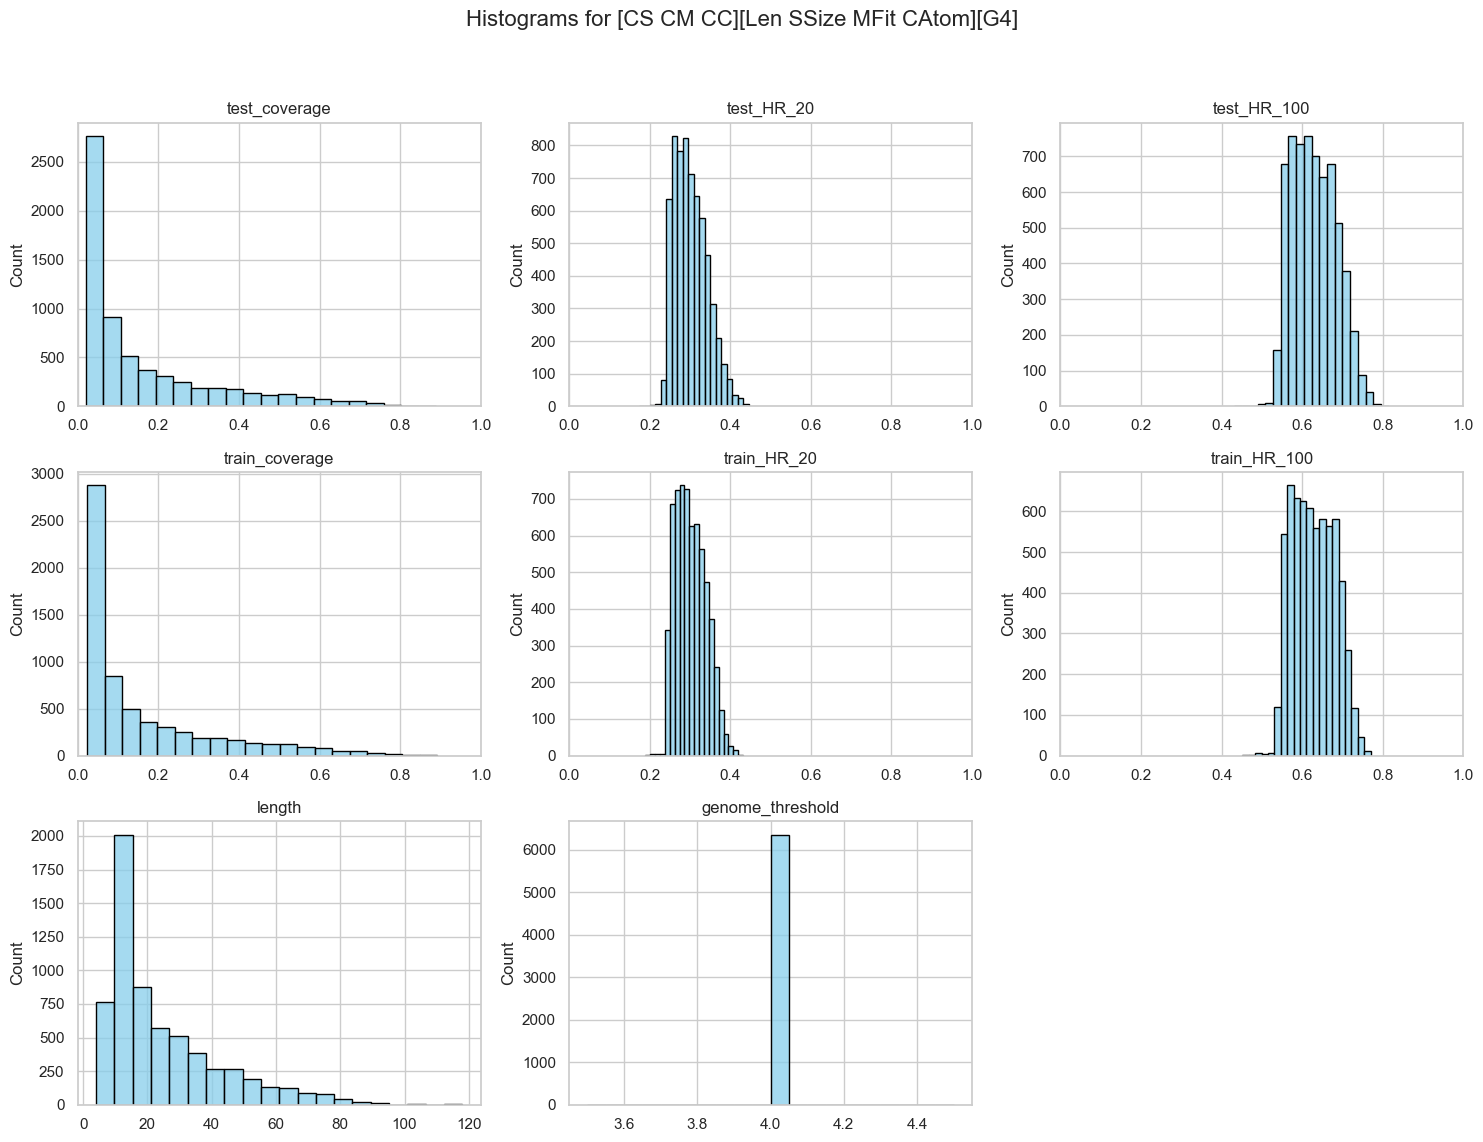

Code name: [CS CM CC][Len SSize MFit CAtom][G5]


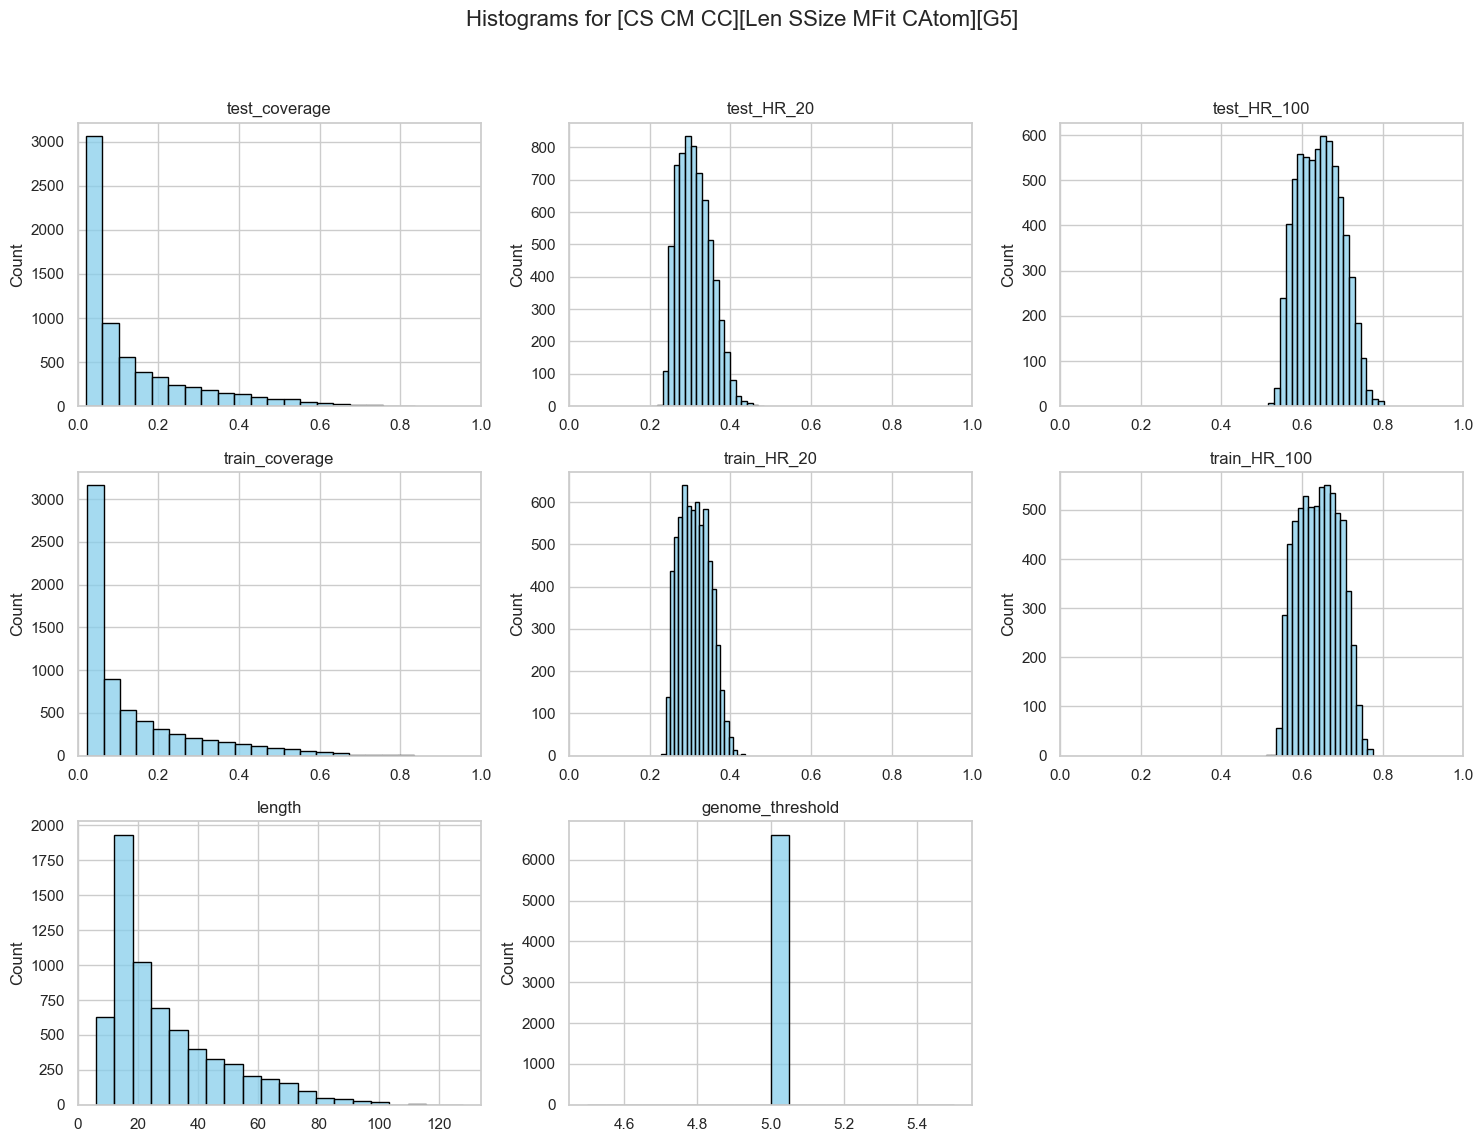

Code name: [CS CM CC][Len SSize MFit CAtom][GNone]


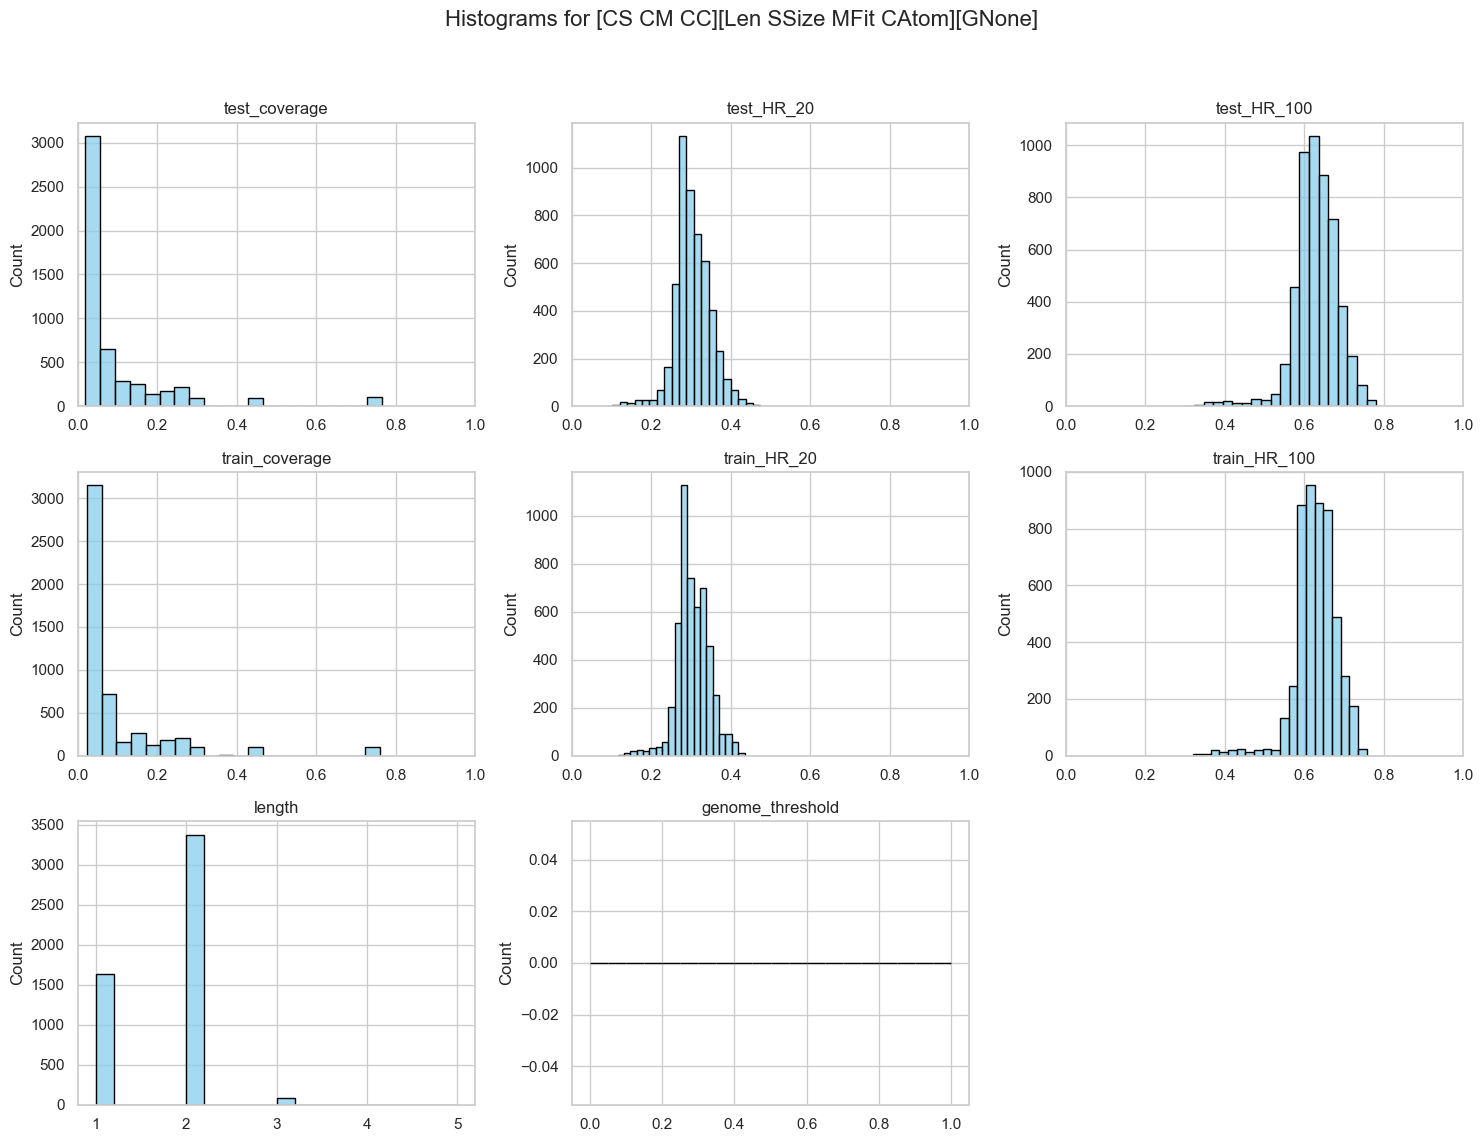

Code name: [CS CM CC][Len SSize MFit CAtom][Gauto]


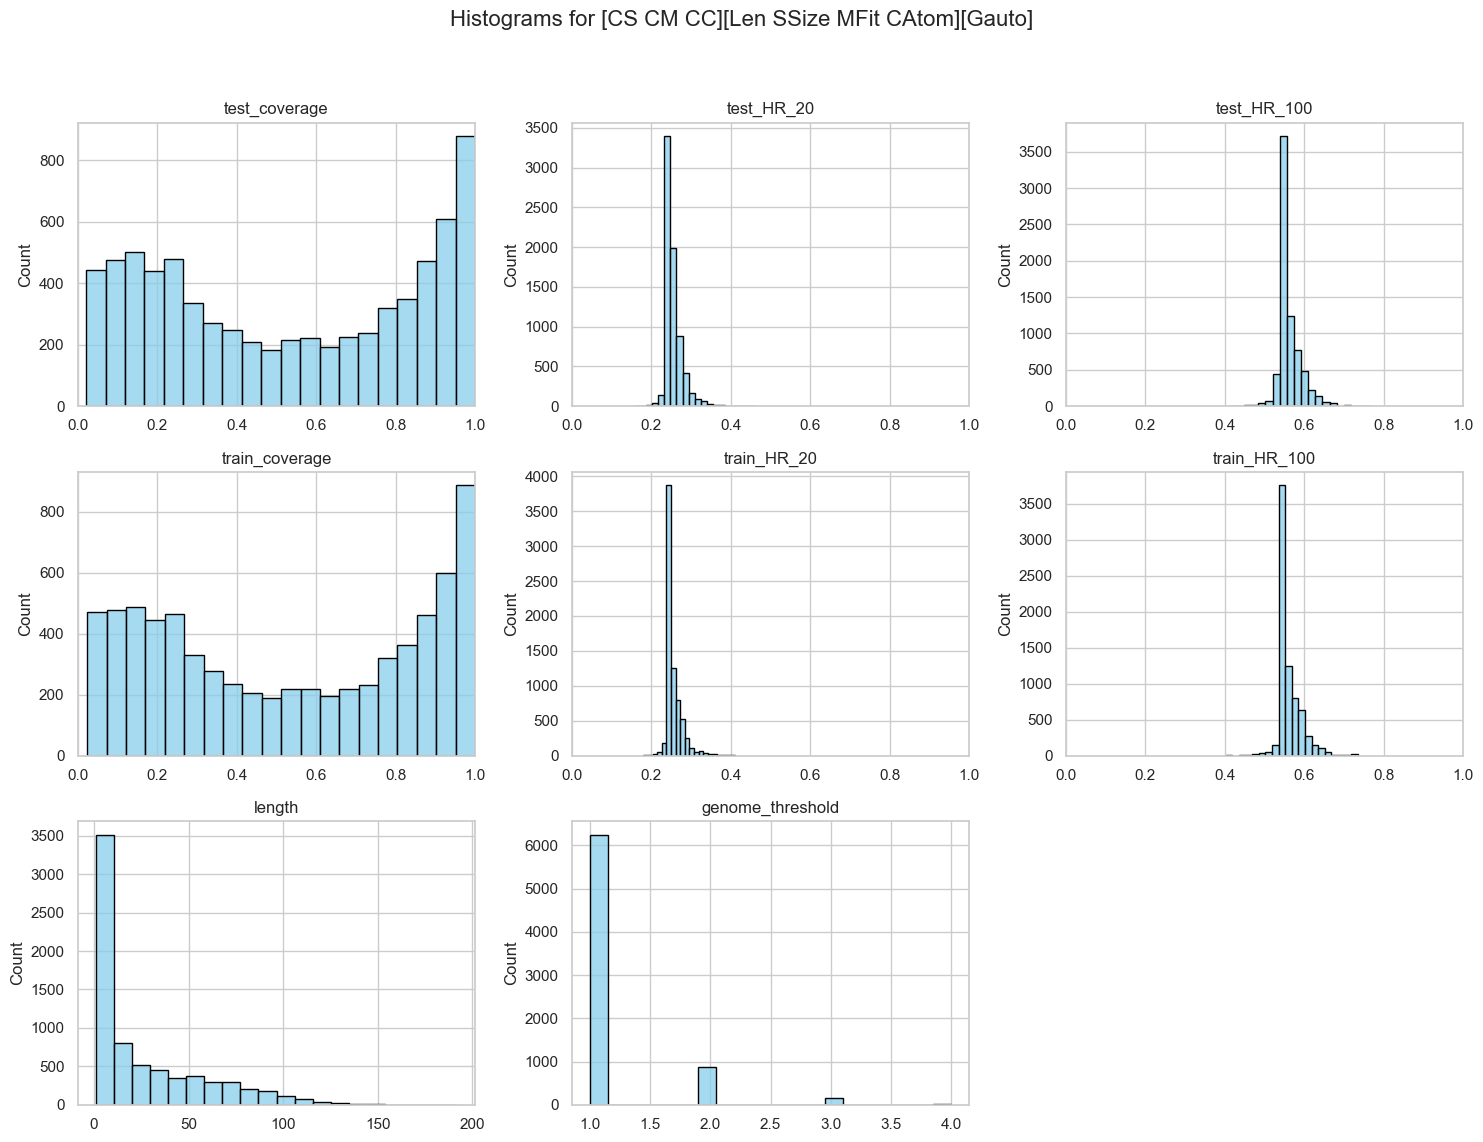

Code name: [CS CM CC][Len SSize MFit][G3]


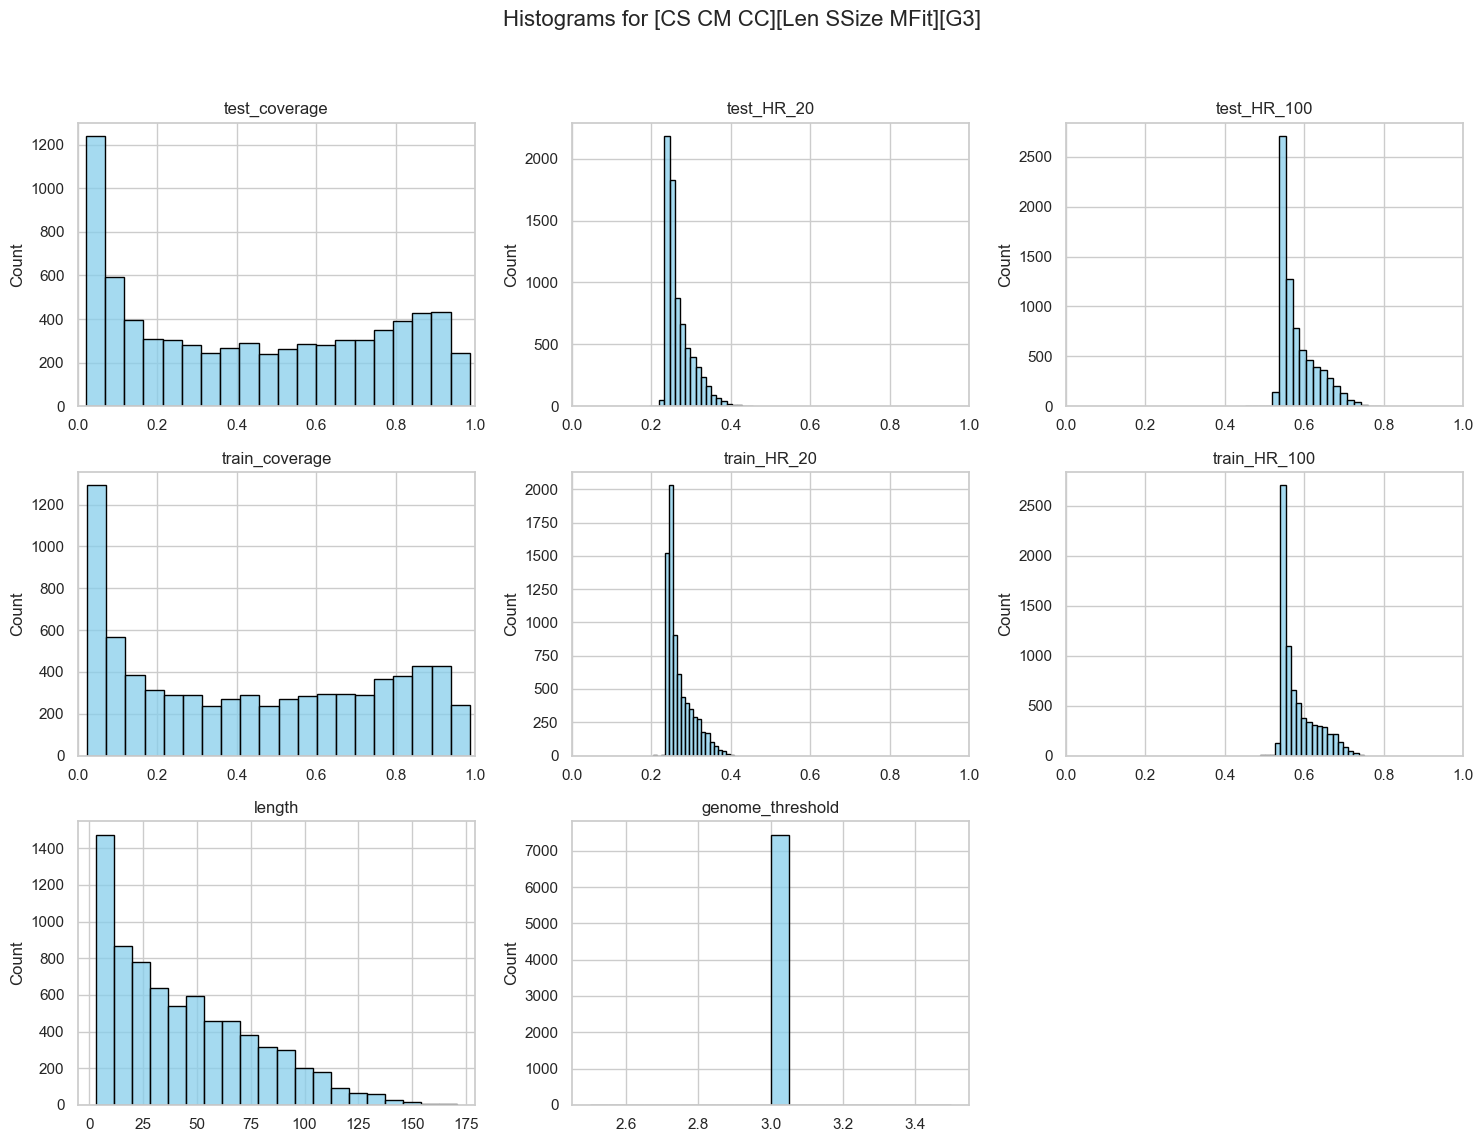

Code name: [CS CM CC][Len SSize MFit][GNone]


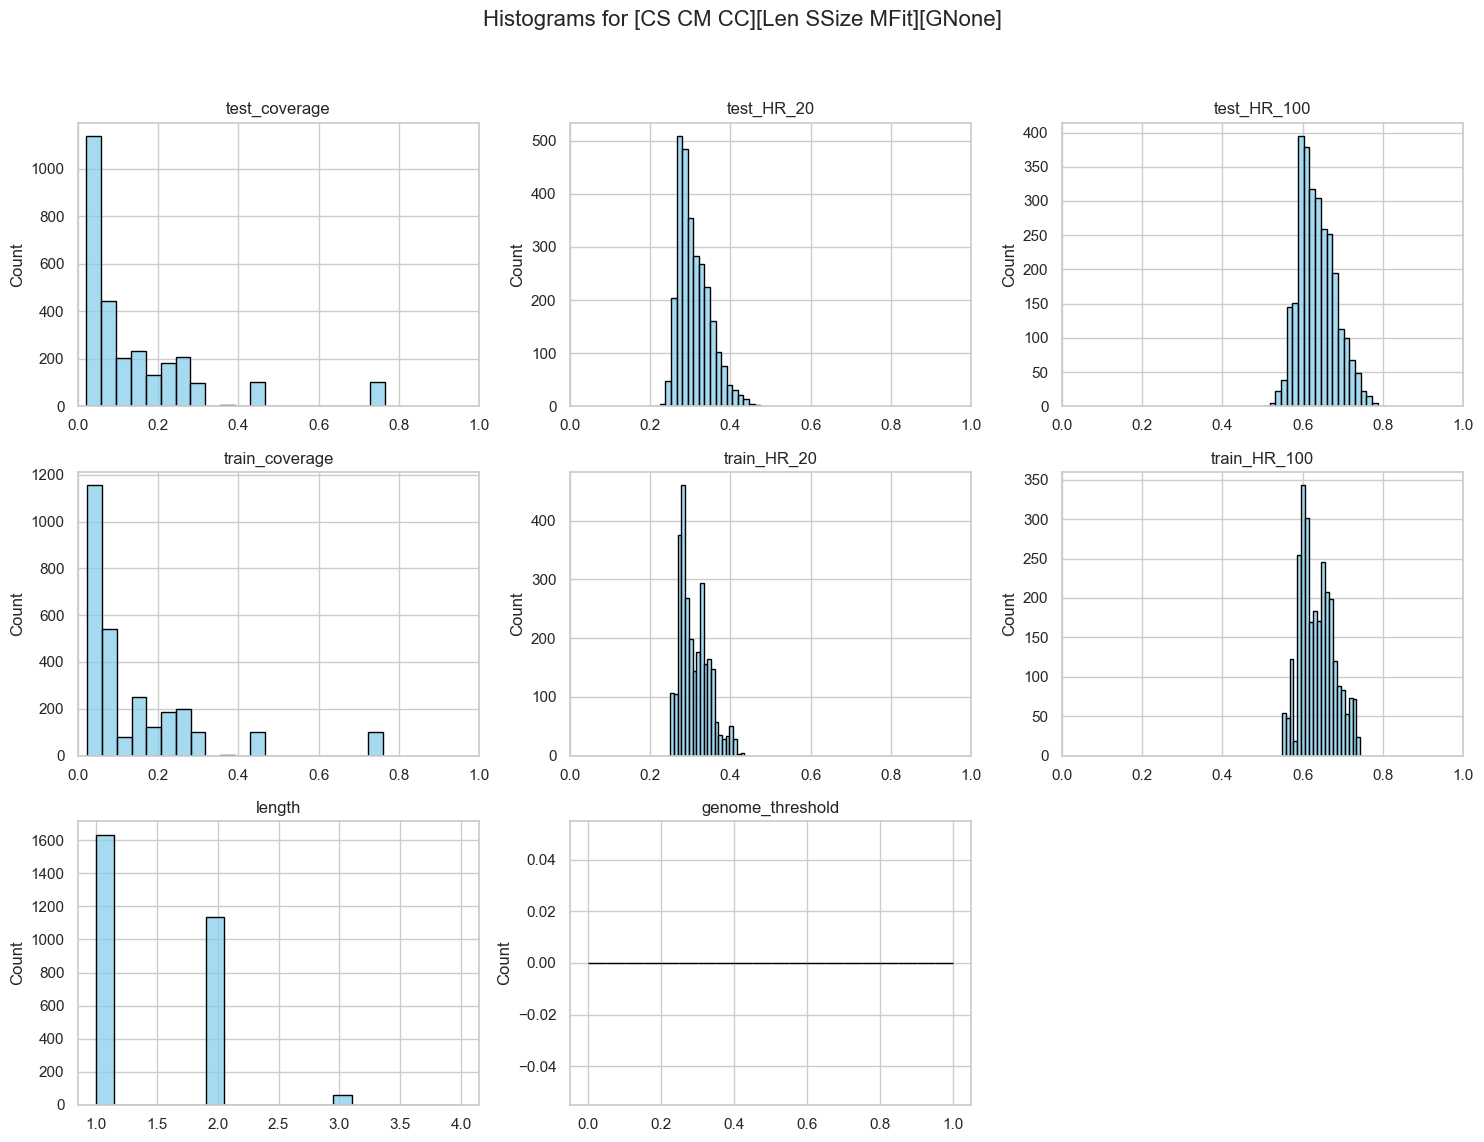

Code name: [CS CM CC][SSize MFit CAtom][G3]


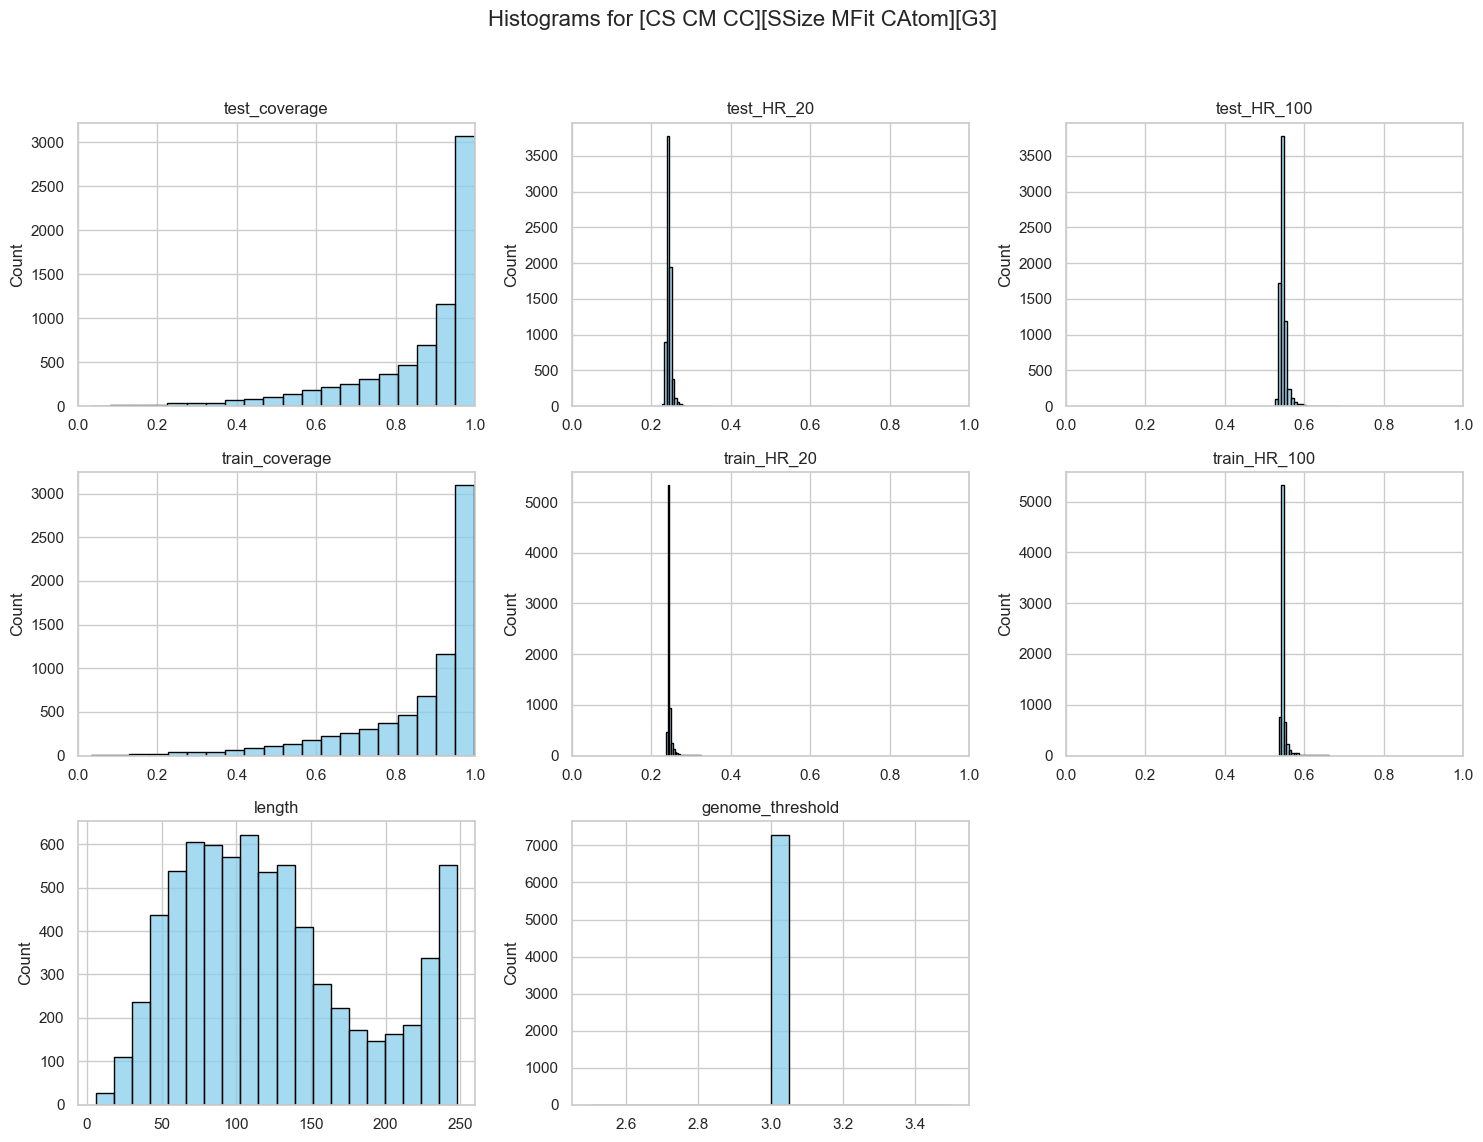

Code name: [CS CM CC][SSize MFit CAtom][GNone]


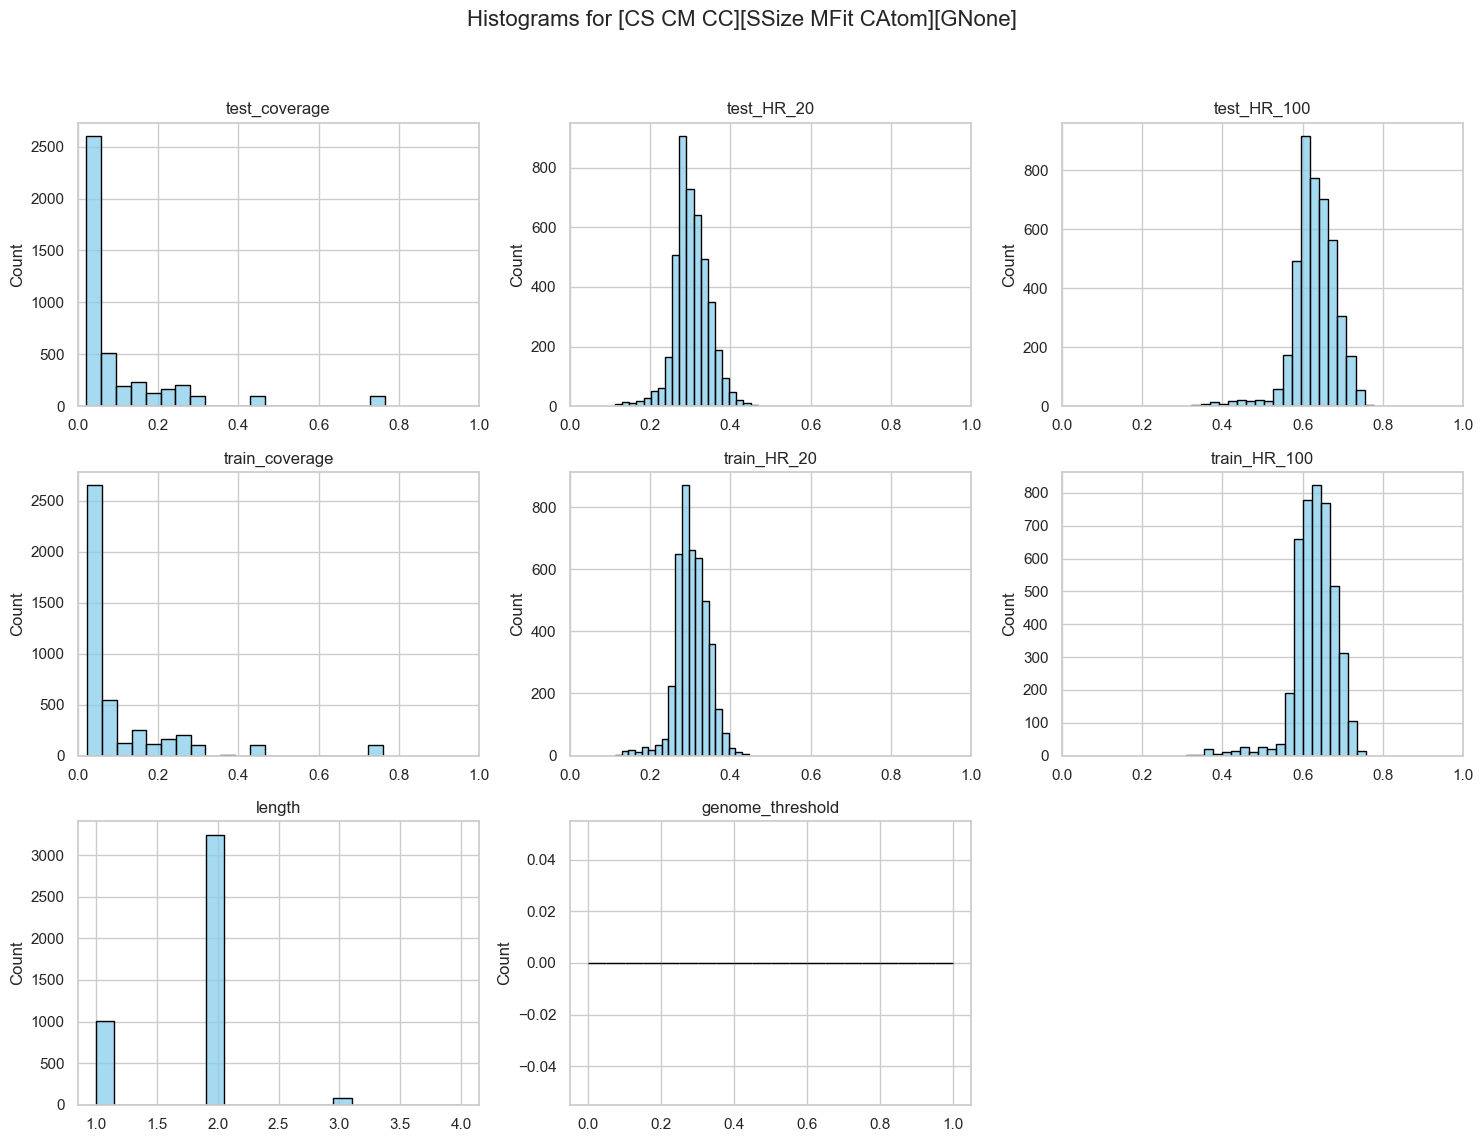

Code name: [CS CM OC][Len SSize MFit CAtom][G3]


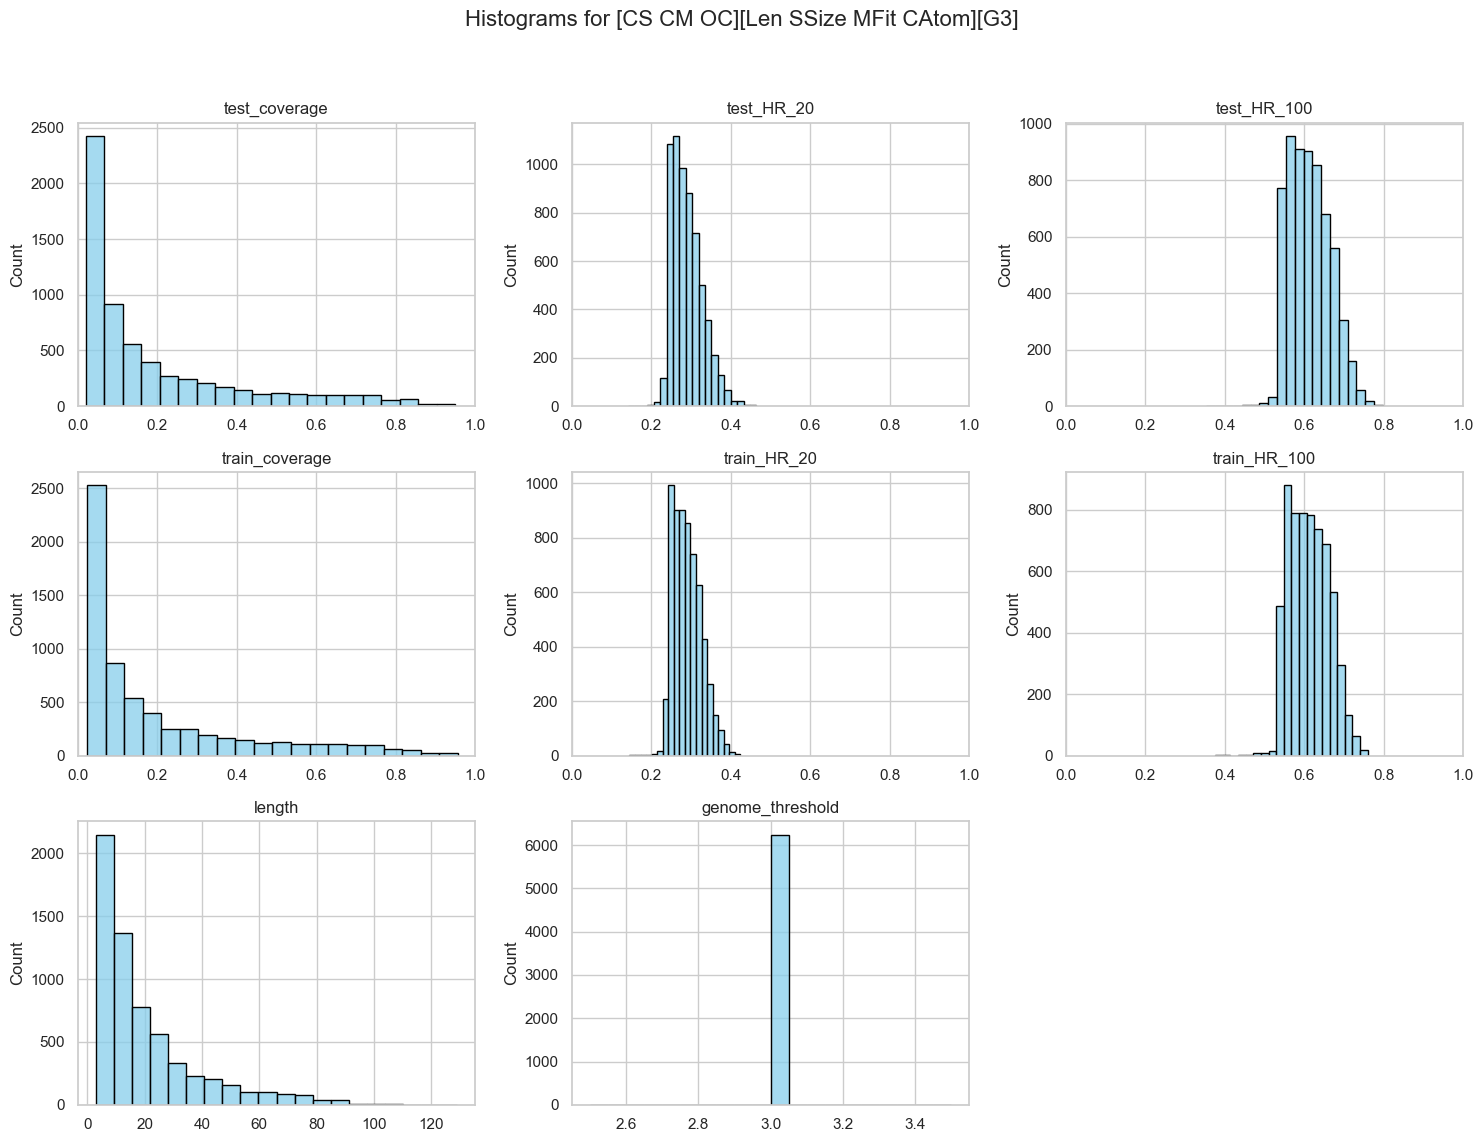

Code name: [CS CM OC][Len SSize MFit CAtom][GNone]


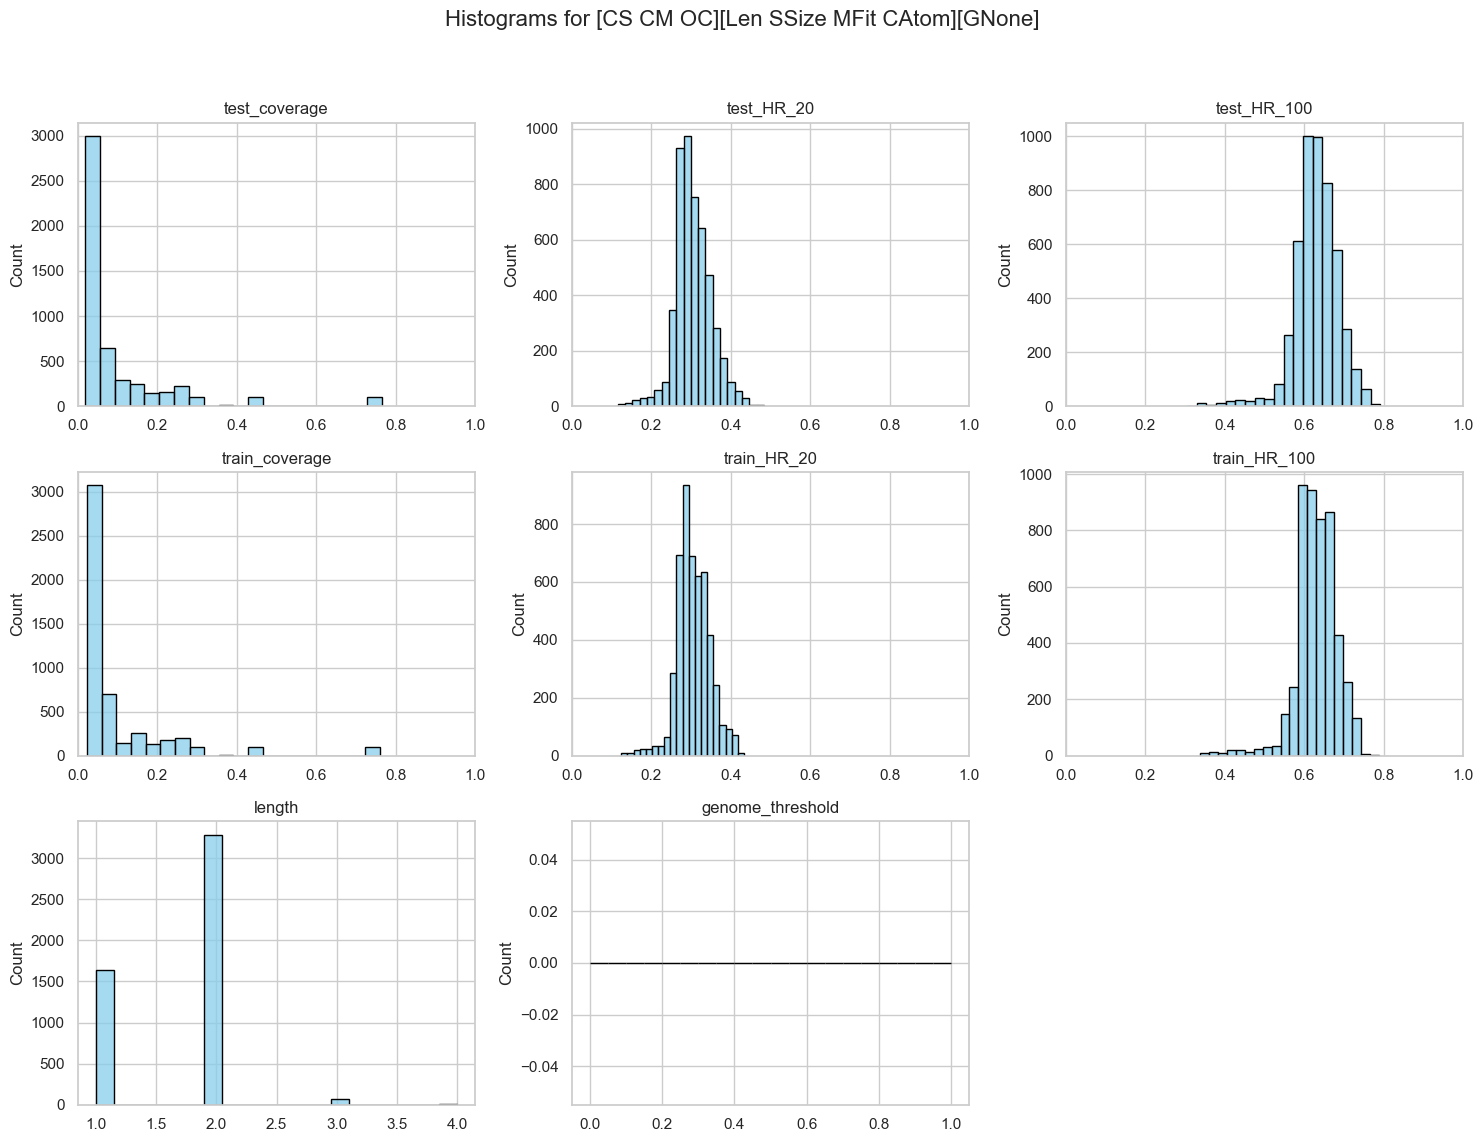

Code name: [CS OM CC][Len SSize MFit CAtom][G3]


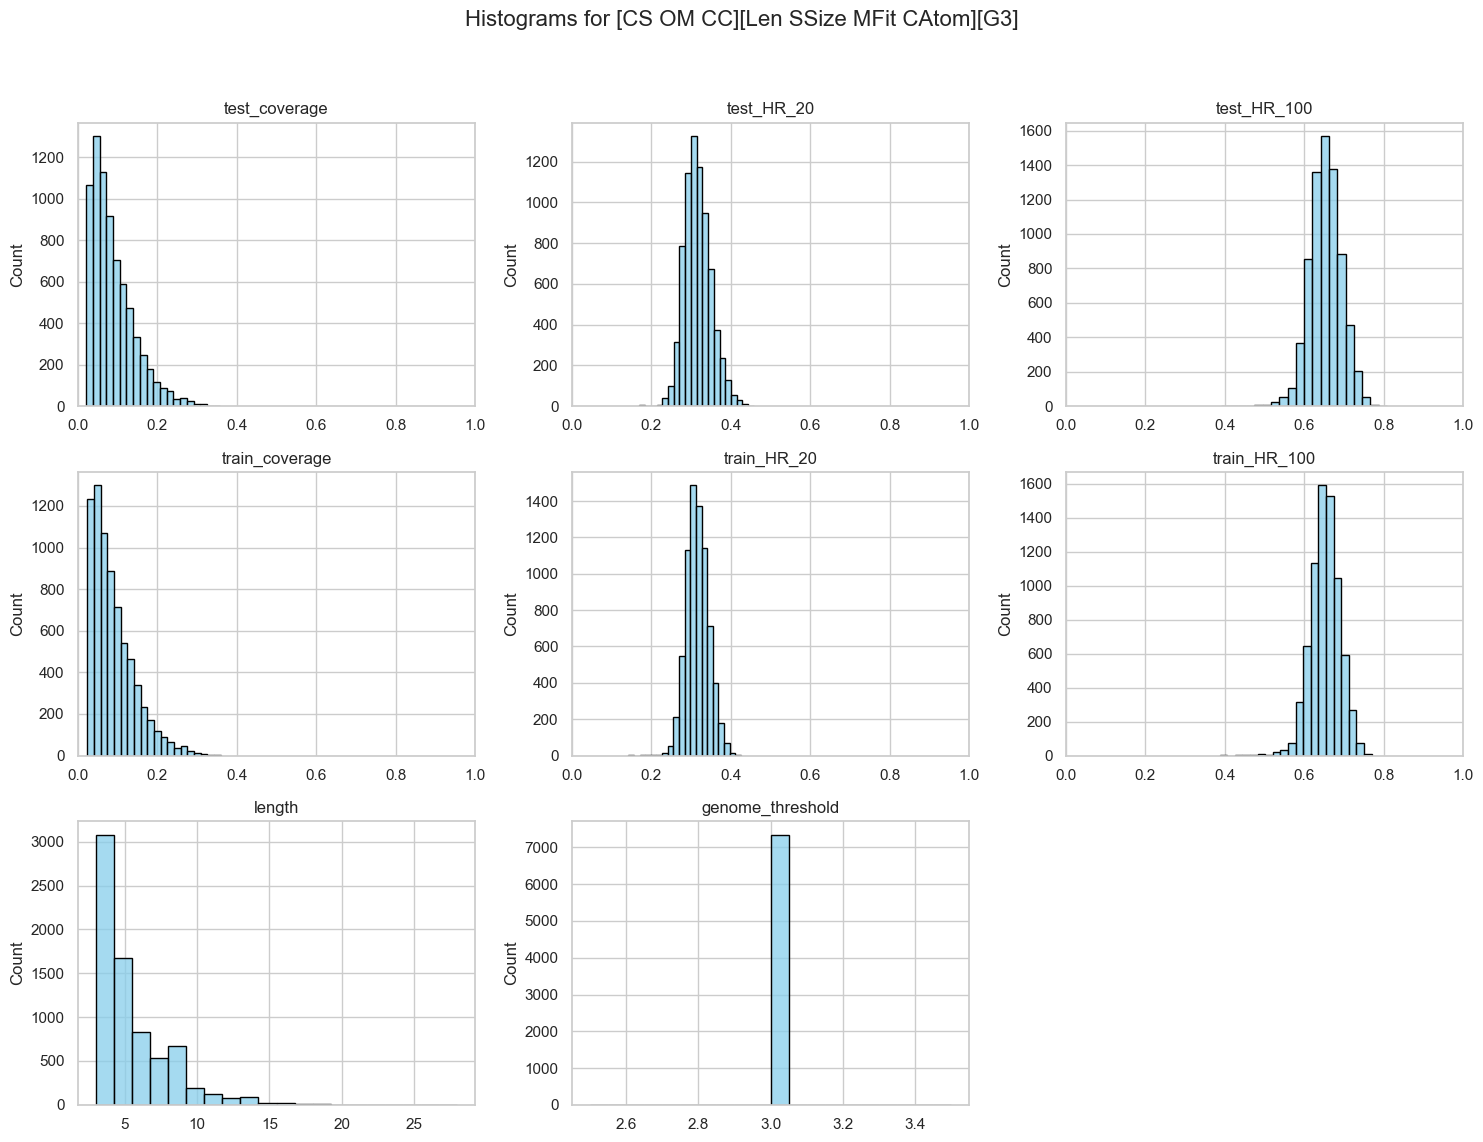

Code name: [CS OM CC][Len SSize MFit CAtom][GNone]


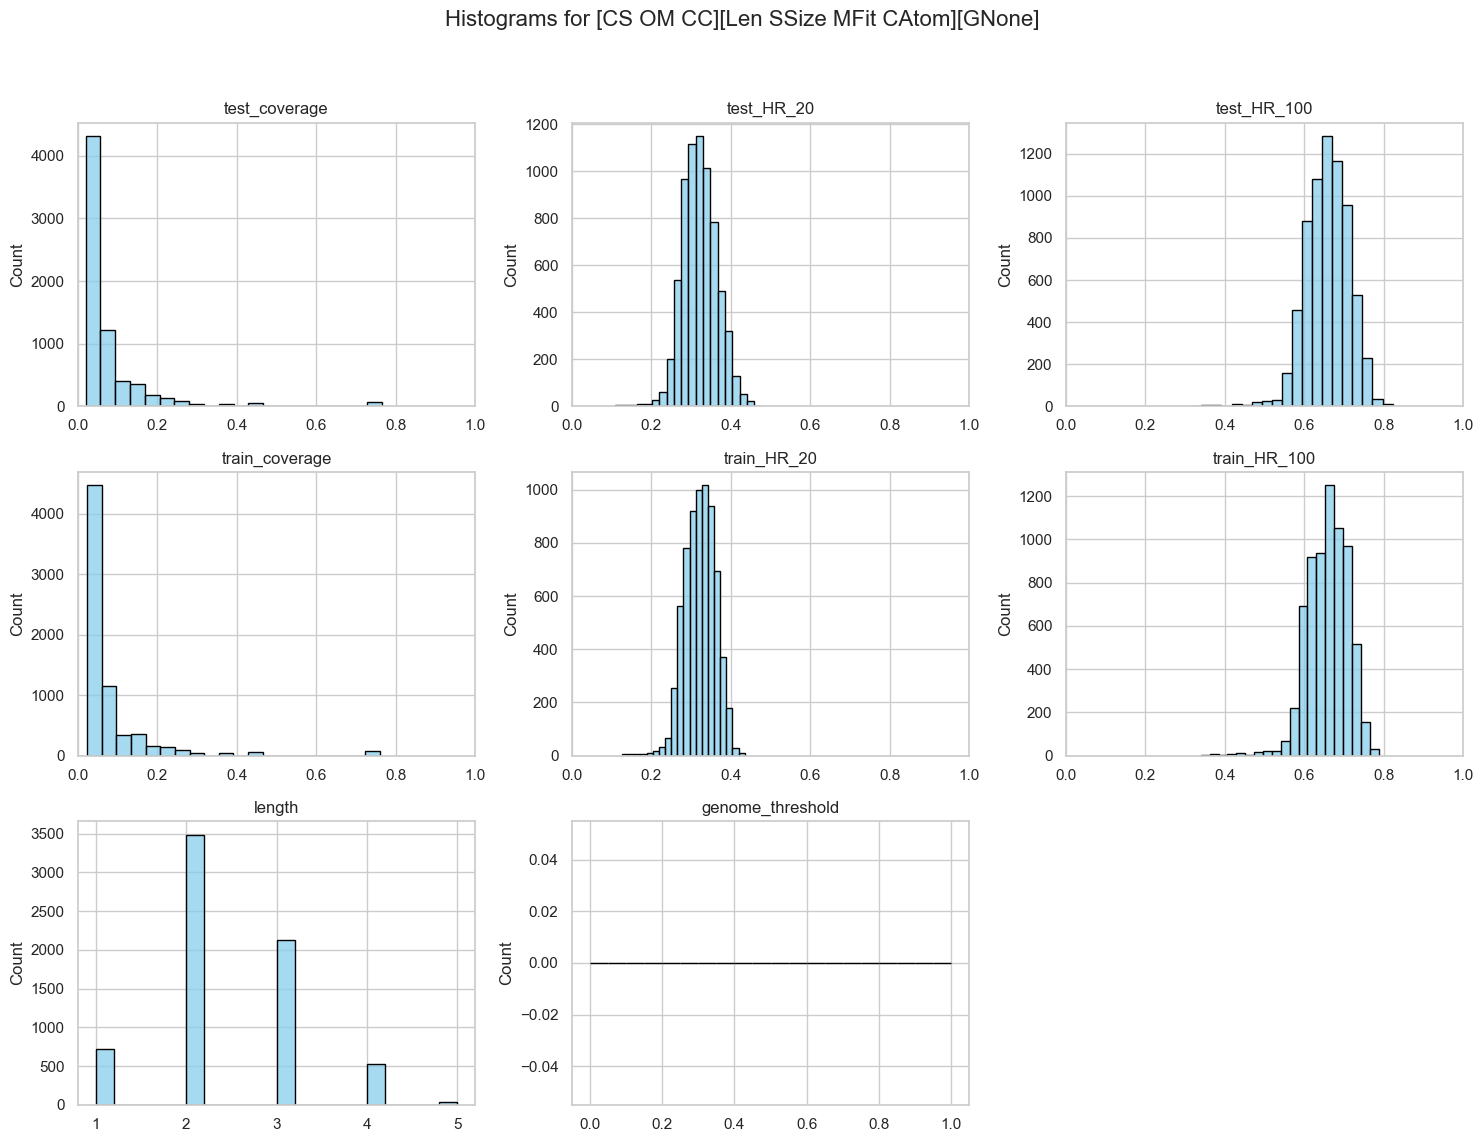

Code name: [OS CM CC][Len SSize MFit CAtom][G3]


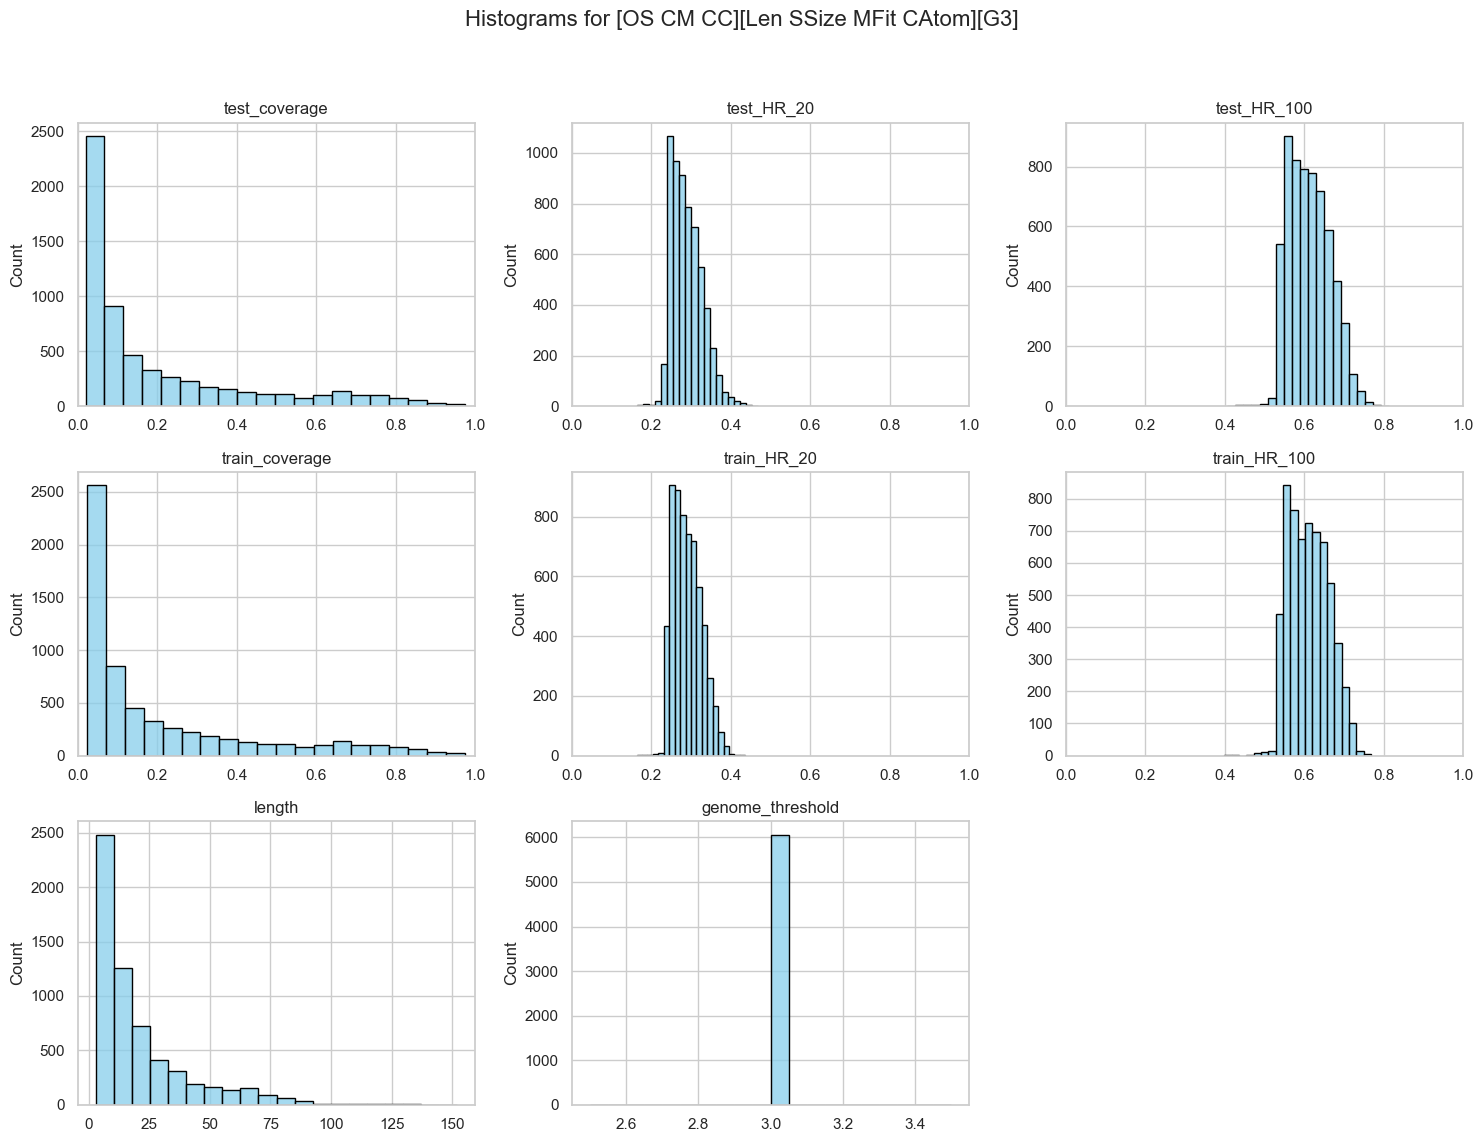

Code name: [OS CM CC][Len SSize MFit CAtom][GNone]


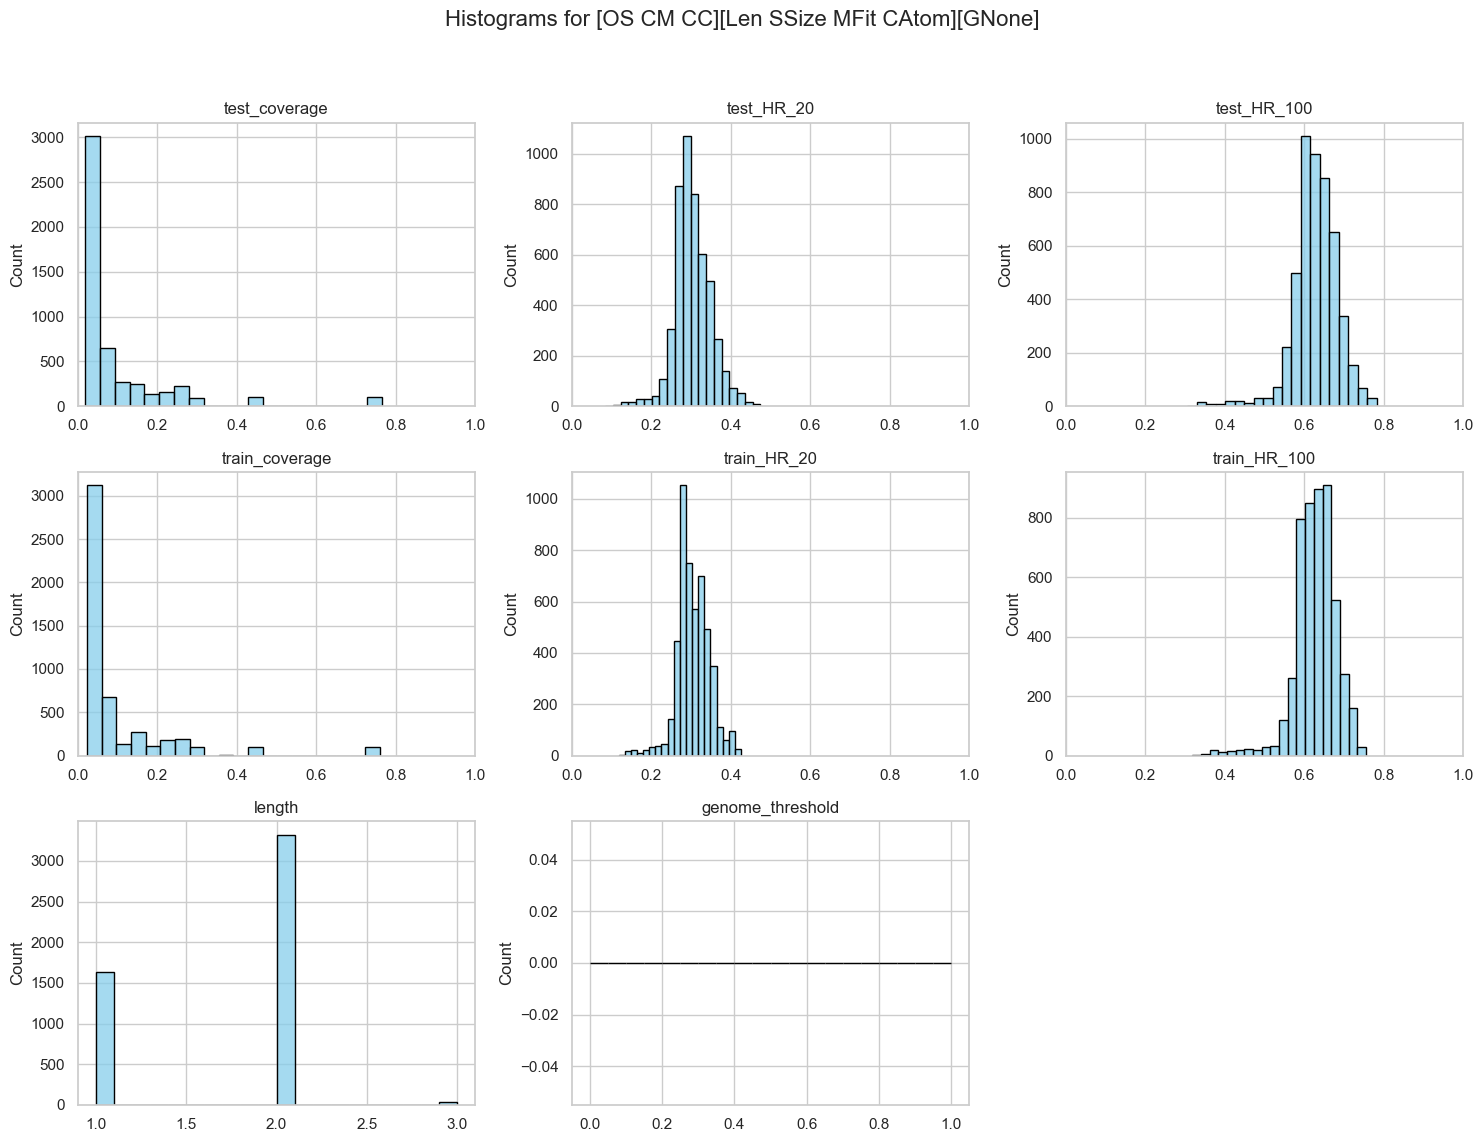

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

# Define metrics in the order you want them shown
metrics = [
    "test_coverage",
    "test_HR_20",
    "test_HR_100",
    "train_coverage",
    "train_HR_20",
    "train_HR_100",
    "length",
    "genome_threshold",
]

# Define which metrics are [0, 1] bounded
bounded_metrics = {
    "test_coverage", "test_HR_20", "test_HR_100",
    "train_coverage", "train_HR_20", "train_HR_100"
}

# Loop through each code_name
for code_name, group_df in results_df.groupby("code_name"):
    print(f"Code name: {code_name}")

    n_metrics = len(metrics)
    n_cols = 3
    # We want test_coverage to start on a new row, so we insert a row break before it
    row_break_index = metrics.index("test_coverage")
    top_half = metrics[:row_break_index]
    bottom_half = metrics[row_break_index:]

    # Total rows = ceil(len(top_half) / n_cols) + ceil(len(bottom_half) / n_cols)
    n_top_rows = -(-len(top_half) // n_cols)
    n_bottom_rows = -(-len(bottom_half) // n_cols)
    total_rows = n_top_rows + n_bottom_rows

    fig, axs = plt.subplots(total_rows, n_cols, figsize=(n_cols * 5, total_rows * 4))
    axs = axs.flatten()

    for i, metric in enumerate(metrics):
        ax = axs[i]
        sns.histplot(group_df[metric], bins=20, kde=False, ax=ax, color="skyblue", edgecolor="black")
        ax.set_title(metric)
        if metric in bounded_metrics:
            ax.set_xlim(0, 1)
        ax.set_xlabel("")
        ax.set_ylabel("Count")

    # Hide any unused subplots
    for j in range(len(metrics), len(axs)):
        axs[j].axis("off")

    plt.suptitle(f"Histograms for {code_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


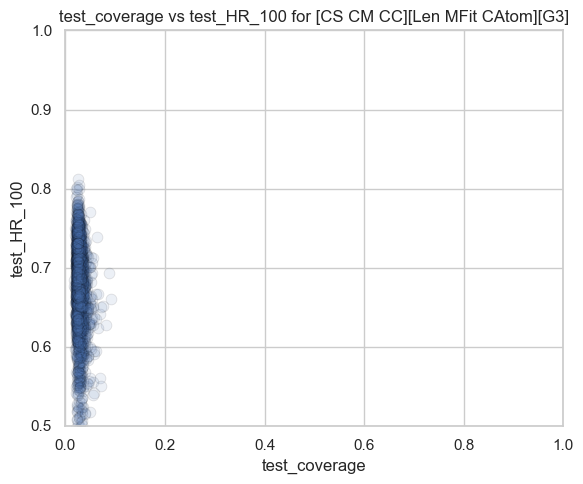

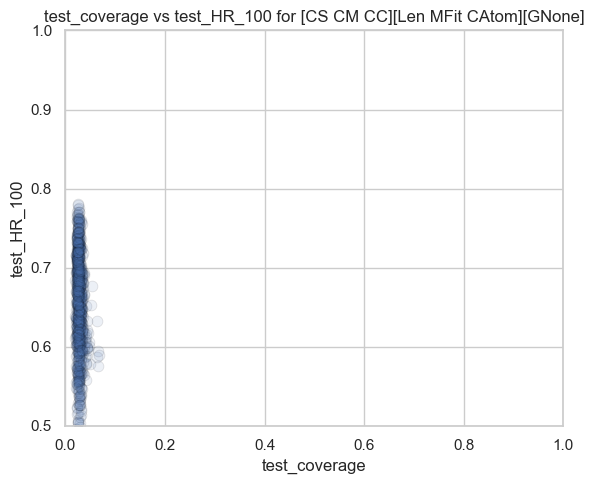

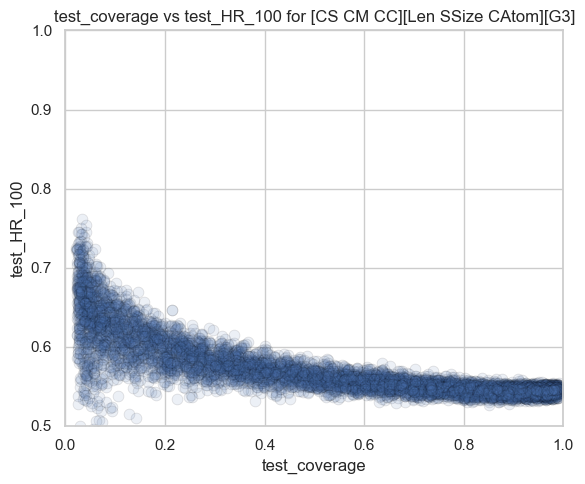

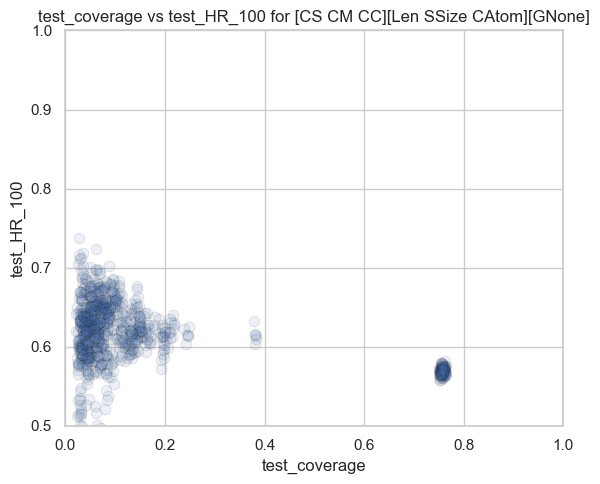

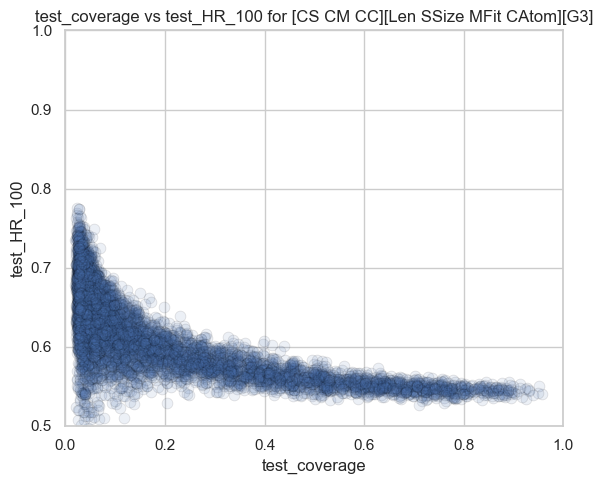

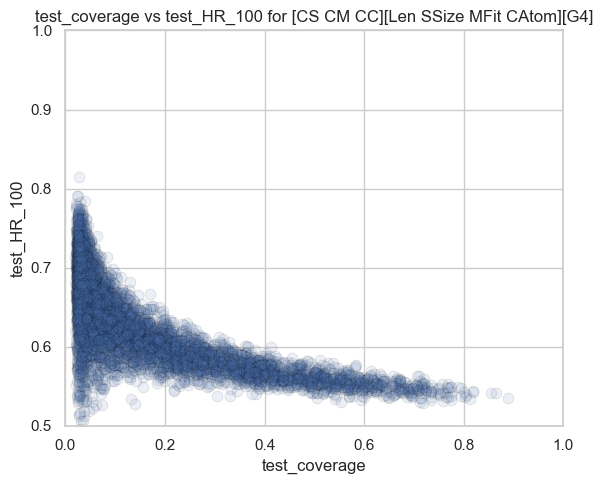

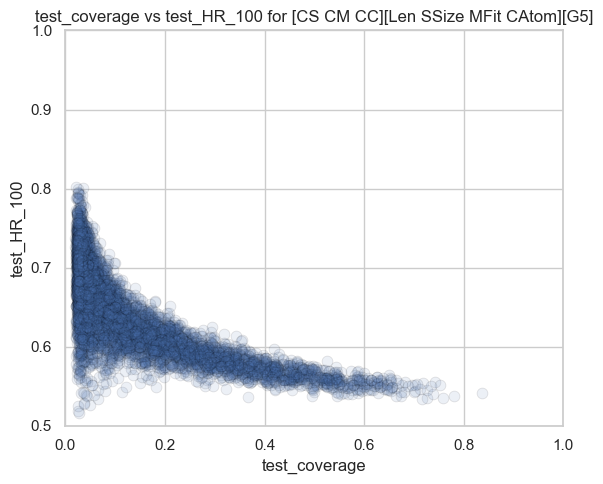

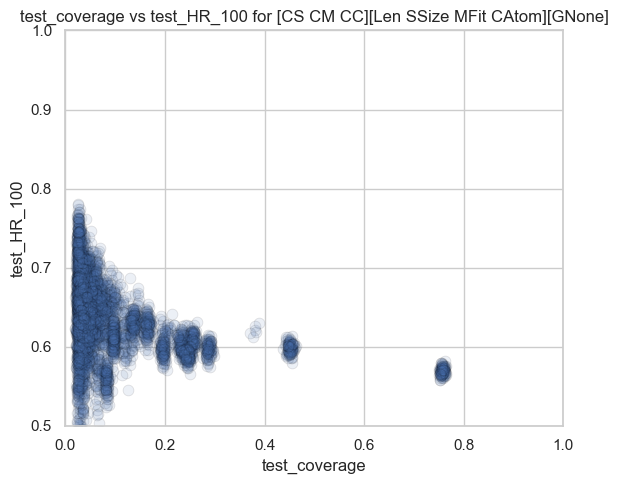

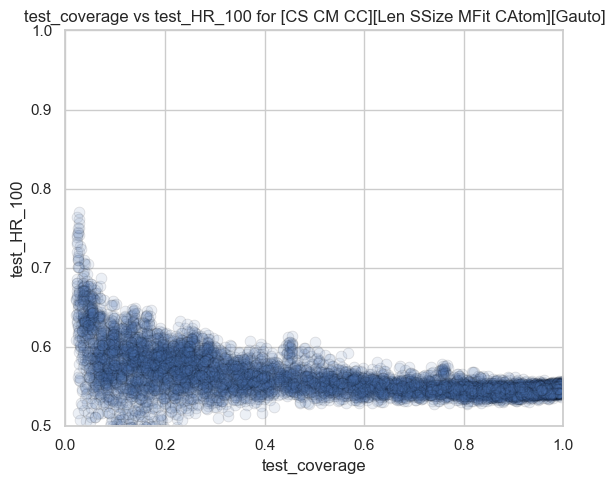

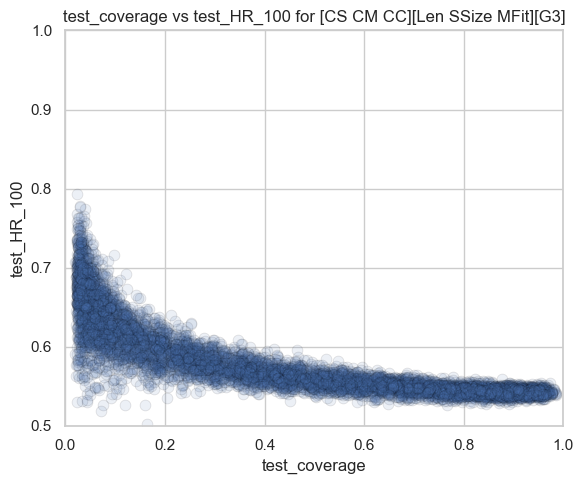

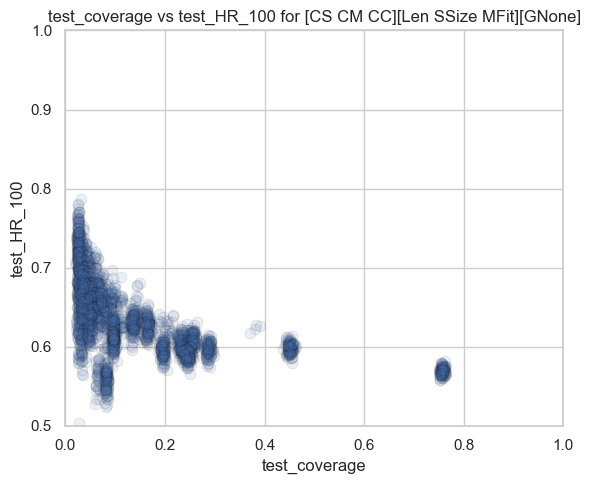

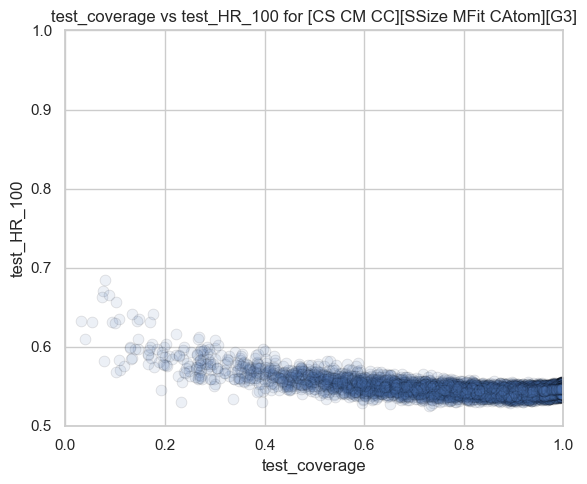

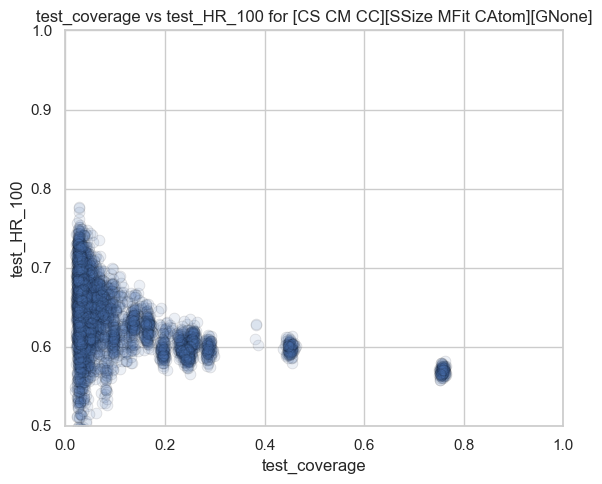

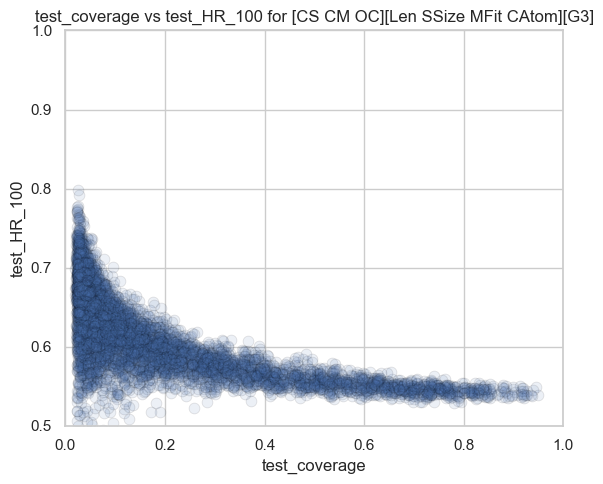

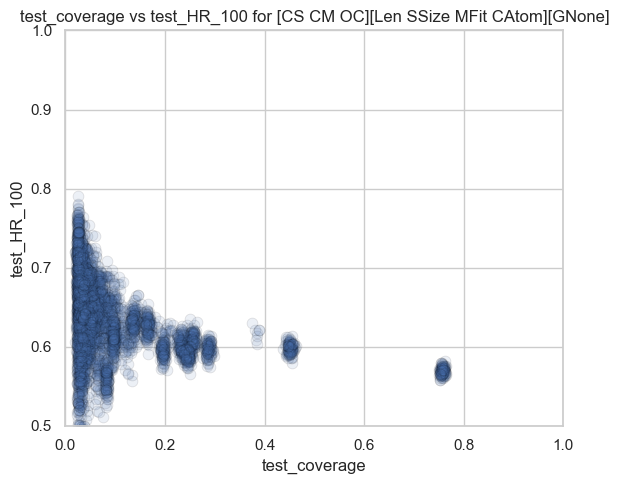

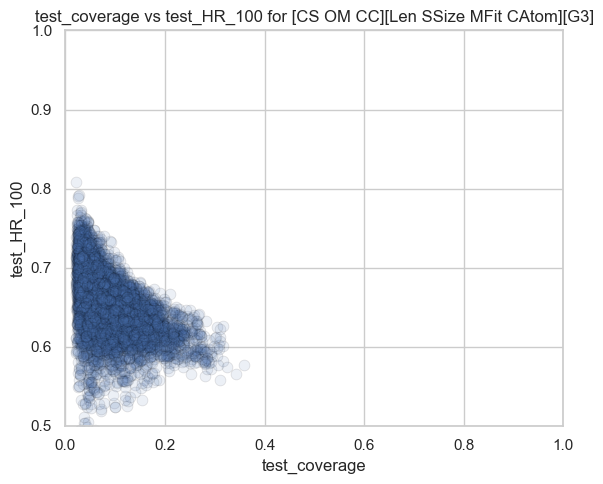

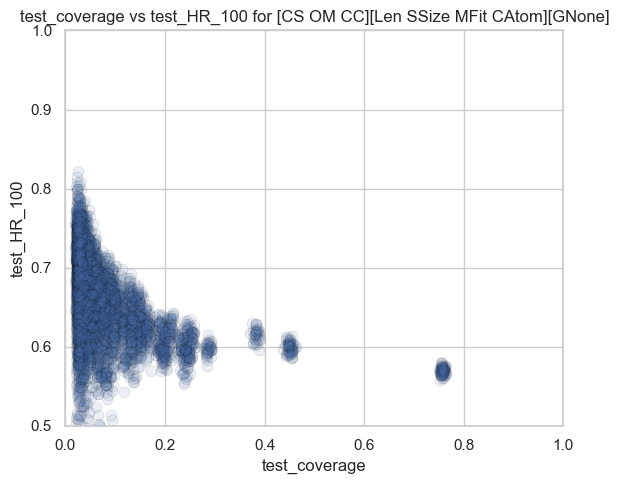

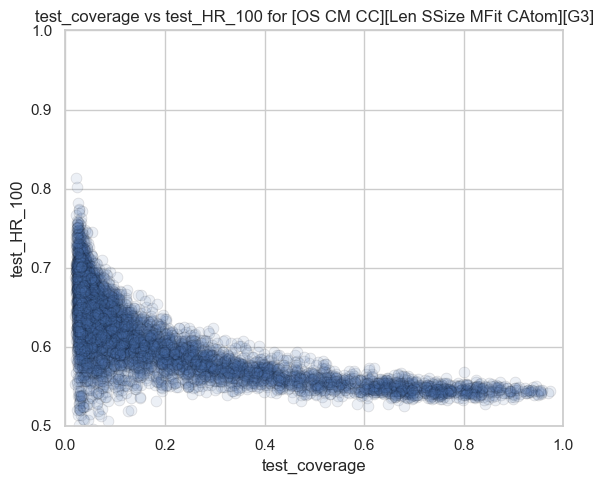

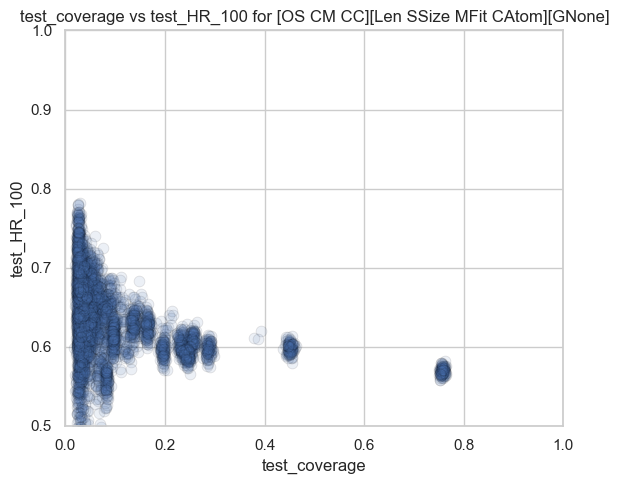

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for consistency
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 5)

for code_name, group_df in results_df.groupby("code_name"):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=group_df,
        x="test_coverage",
        y="test_HR_100",
        s=60,
        alpha=0.1,
        edgecolor="black"
    )

    plt.title(f"test_coverage vs test_HR_100 for {code_name}")
    plt.xlabel("test_coverage")
    plt.ylabel("test_HR_100")
    plt.xlim(0, 1)
    plt.ylim(0.5, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
